## A Data Science Project On Telecommunication Customer Churns

**Table Of Content**
* Part 1: DEA & Visualization
* Part 2.1: Machine Learning Model: Logistic Regression 
* Part 2.2: Machine Learning Model: Decision Tree 
* Part 2.3: Machine Learning Model: Deep Learning
* Part 3: Machine Learning Model: KMeans Clustering
* Part 4: Conclusion & Recommendationa

#### Part 1: DEA & Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


#### Shape

In [3]:
df.shape

(7043, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


Observation
* Customers have been with the firm between less than a year and 6 years. On average, customers had been with the firm for 5 years.
* Monthly charges vary from 18 dollars to 118 dollars.
* average churn scores is above 0.5.
* CLTV is between 2003 and 6500 and the average is 4400.

#### check values for each features

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("-----------")

CustomerID
['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
-----------
Count
[1]
-----------
Country
['United States']
-----------
State
['California']
-----------
City
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
-----------
Zip Code
[90003 90005 90006 ... 96128 96134 96146]
-----------
Lat Long
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
-----------
Latitude
[33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
-----------
Longitude
[-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
-----------
Gender
['Male' 'Female']
-----------
Senior Citizen
['No' 'Yes']
-----------
Partner
['No' 'Yes']
-----------
Dependents
['No' 'Yes']
-----------
Tenure Months
[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 2

#### Drop Meaningless Features and unrelated features

In [7]:
df.drop(["CustomerID","Country","State","Count","Churn Label","Churn Score","CLTV"],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Lat Long           7043 non-null   object 
 3   Latitude           7043 non-null   float64
 4   Longitude          7043 non-null   float64
 5   Gender             7043 non-null   object 
 6   Senior Citizen     7043 non-null   object 
 7   Partner            7043 non-null   object 
 8   Dependents         7043 non-null   object 
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   object 
 11  Multiple Lines     7043 non-null   object 
 12  Internet Service   7043 non-null   object 
 13  Online Security    7043 non-null   object 
 14  Online Backup      7043 non-null   object 
 15  Device Protection  7043 non-null   object 
 16  Tech Support       7043 

#### Convert total charges from object to float and fill the null values with the mean values

In [9]:
df["Total Charges"]=pd.to_numeric(df["Total Charges"],errors="coerce")
df["Total Charges"]=df["Total Charges"].fillna(df["Total Charges"].mean())

In [10]:
for col in df.columns:
    print(col)
    print(df[col].dtype)
    print(df[col].unique())
    print("-----------")

City
object
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
-----------
Zip Code
int64
[90003 90005 90006 ... 96128 96134 96146]
-----------
Lat Long
object
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
-----------
Latitude
float64
[33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
-----------
Longitude
float64
[-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
-----------
Gender
object
['Male' 'Female']
-----------
Senior Citizen
object
['No' 'Yes']
-----------
Partner
object
['No' 'Yes']
-----------
Dependents
object
['No' 'Yes']
-----------
Tenure Months
int64
[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
------

## Convert Binary categorical to Numerical values

In [11]:
df["Gender"]=df.Gender.apply(lambda x: 1 if x=="Male" else 0)
df["Senior Citizen"]=df["Senior Citizen"].apply(lambda x: 1 if x=="Yes" else 0)
df["Partner"]=df["Partner"].apply(lambda x: 1 if x=="Yes" else 0)
df["Dependents"]=df["Dependents"].apply(lambda x: 1 if x=="Yes" else 0)
df["Phone Service"]=df["Phone Service"].apply(lambda x: 1 if x=="Yes" else 0)
df["Paperless Billing"]=df["Paperless Billing"].apply(lambda x: 1 if x=="Yes" else 0)

## Visualization

#### Check Null Values

<Axes: >

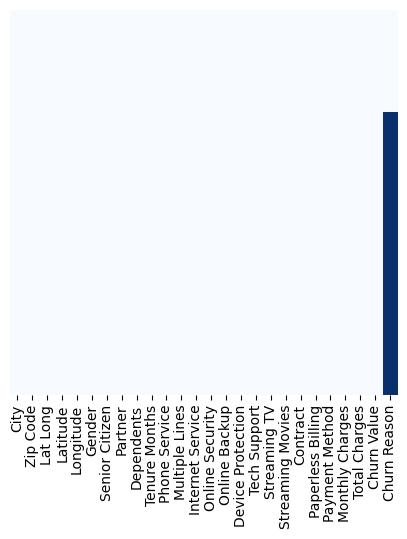

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),cbar=False,cmap="Blues",yticklabels=False)

Observation
* Lots of null values for churn reasons
* Replace null values with "Missing"

In [13]:
df["Churn Reason"]=df["Churn Reason"].fillna("Missing")
df["Churn Reason"].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', 'Missing'], dtype=object)

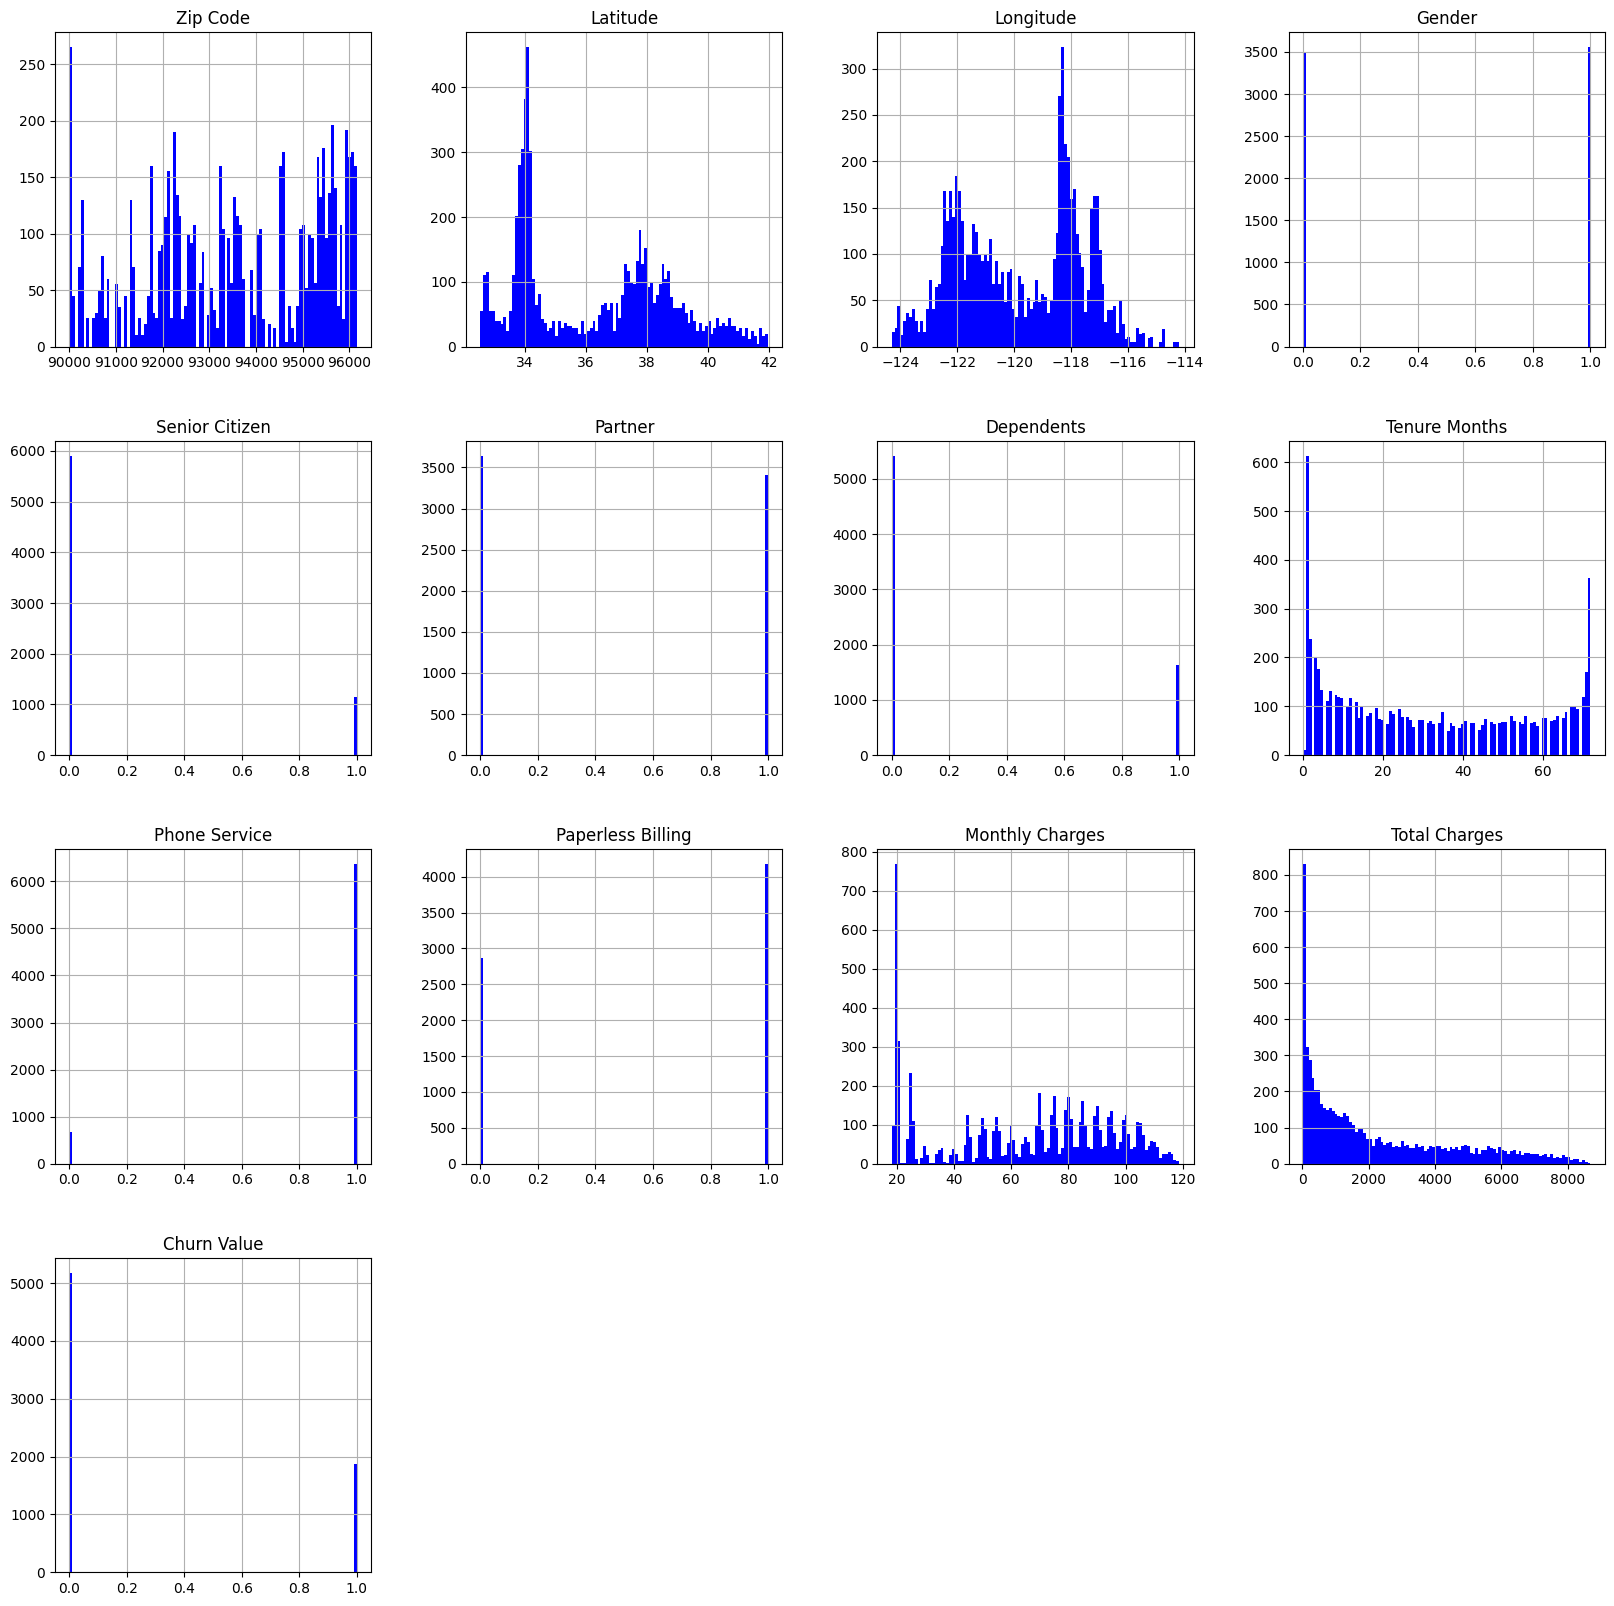

In [14]:
df.hist(bins=100,figsize=(20,20),color="b")
plt.show()

Observation
* Many Customers live around Latitude of 34 and 38 and around Longitude of -122 and -118.
* Clients genders are equally distributed.
* Seniors are minorities.
* More people don;t have dependents. 
* More people use papaerless bills.
* Lots of clients have a tenure month of less than 10 month and more than 70 months.
* Majority of the monthly charges are around 20 dolars.
* Majority of total charges are under 1000 dollars.

#### Anatomy of Churn 

In [15]:
churn_rate=df["Churn Value"].mean()
churn_df=df[df["Churn Value"]==1]
unchurn_df=df[df["Churn Value"]==0]
print(f"The total churn rate is {round(churn_rate*100,2)}%. The total unchurn rate is {round((1-churn_rate)*100,2)}%.")
print(f"Total= {df.shape[0]}")
print(f"Churned total={churn_df.shape[0]}")
print(f"Unhurned total={unchurn_df.shape[0]}")

The total churn rate is 26.54%. The total unchurn rate is 73.46%.
Total= 7043
Churned total=1869
Unhurned total=5174


In [16]:
churn_df.describe()

,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.0
mean,93532.352595,36.268614,-119.782388,0.497592,0.254682,0.357945,0.056715,17.979133,0.909042,0.749064,74.441332,1531.796094,1.0
std,1858.939970,2.473911,2.163024,0.500128,0.435799,0.479524,0.231359,19.531123,0.287626,0.433668,24.666053,1890.822994,0.0
min,90001.000000,32.555828,-124.301372,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.850000,18.850000,1.0
25%,92105.000000,34.038983,-121.799917,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,56.150000,134.500000,1.0
50%,93554.000000,36.298780,-119.711868,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,79.650000,703.550000,1.0
75%,95358.000000,38.200231,-118.020188,1.000000,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,94.200000,2331.300000,1.0
max,96161.000000,41.962127,-114.192901,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.350000,8684.800000,1.0


In [17]:
unchurn_df.describe()

,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.0
mean,93518.212215,36.287436,-119.804838,0.507344,0.128721,0.528218,0.293970,37.569965,0.901044,0.535562,61.265124,2554.765772,0.0
std,1868.429496,2.449340,2.156210,0.499994,0.334923,0.499251,0.455622,24.113777,0.298632,0.498782,31.092648,2327.012699,0.0
min,90001.000000,32.555828,-124.301372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.0
25%,92091.000000,34.029076,-121.823565,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,25.100000,579.575000,0.0
50%,93551.000000,36.414414,-119.739935,1.000000,0.000000,1.000000,0.000000,38.000000,1.000000,1.000000,64.425000,1689.175000,0.0
75%,95345.750000,38.227285,-118.049237,1.000000,0.000000,1.000000,1.000000,61.000000,1.000000,1.000000,88.400000,4262.850000,0.0
max,96148.000000,41.962127,-114.192901,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8672.450000,0.0


#### Churn Rate For Different Features

In [18]:
col=df.select_dtypes("number").columns
df.groupby("Senior Citizen")["Churn Value"].mean()

Senior Citizen
0    0.236062
1    0.416813
Name: Churn Value, dtype: float64

In [19]:
col=df.select_dtypes("number").columns

(df.groupby("Churn Value")[col].mean().T
 .rename(columns={0:"Stayed",1:"Left"})
 .style.background_gradient(axis=1)
)

Churn Value,Stayed,Left
Zip Code,93518.212215,93532.352595
Latitude,36.287436,36.268614
Longitude,-119.804838,-119.782388
Gender,0.507344,0.497592
Senior Citizen,0.128721,0.254682
Partner,0.528218,0.357945
Dependents,0.293970,0.056715
Tenure Months,37.569965,17.979133
Phone Service,0.901044,0.909042
Paperless Billing,0.535562,0.749064


Observations:
* Clients who left tend to be seniors
* Clients who stayed tend to have a partner
* Clients who left tend not to have dependents
* Clients who stayed have a tenure twice as long as those who left
* Clients who stayed have a higher total charges
* Both groups use phone services
* Both groups in high percentage use paperless billings.

#### Correlation Analysis

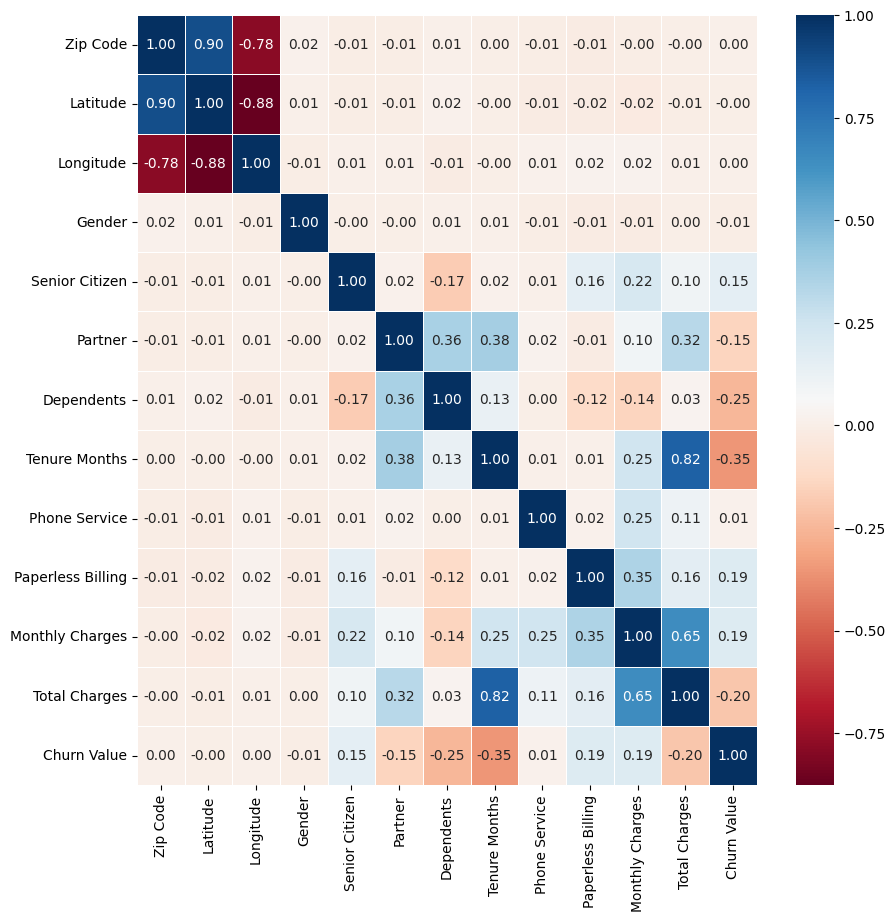

In [20]:
cor=df[col].corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True, cmap="RdBu",fmt="0.2f",linewidth=0.5)
plt.show()

Observation
* The zip code, latitude and longitude are highly correlated. It makes sense.
* Clients having partner are associated with dependents, longer tenure months, and higher total chares.
* Senior citizens are associated with the use of paperless bills, higher monthly charges, and more likely to churn.
* Clinets with longer tenure months tend to have a higher total charges and less likely to churn.
* Clients with a phone service tend to have a higher monthly charges.
* Churn values are positively correlated with senior citizens, paperless billing and monthly chares; however, it is negatively correlated with having a partner, dependents, shorter tenure months and total charges.

#### Churn Vs Geospacial

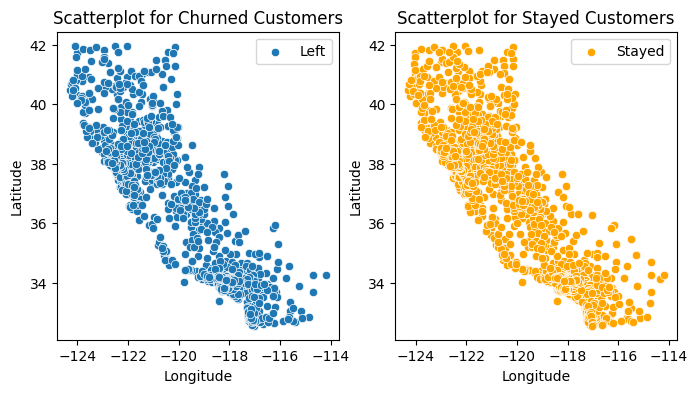

In [21]:
plt.figure(figsize=(8,4))
#sns.scatterplot(x=df.Longitude,y=df.Latitude,hue=df["Churn Value"])
plt.subplot(121)
sns.scatterplot(data=df.loc[df["Churn Value"]==1],x="Longitude",y="Latitude",label="Left")
plt.title("Scatterplot for Churned Customers")
plt.subplot(122)
sns.scatterplot(data=df.loc[df["Churn Value"]==0],x="Longitude",y="Latitude",label="Stayed",c="orange")
plt.title("Scatterplot for Stayed Customers")
plt.show()

Observation 
* Churned and Unchured customers are all cross the entire California state.

In [22]:
df.columns

Index(['City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Reason'],
      dtype='object')

#### Drop Zip Code, Lat Long, Latitude, and Longitude

In [23]:
#df.drop(["Zip Code","Lat Long","Latitude","Longitude"],axis=1,inplace=True)
df.drop(["Zip Code","Lat Long","Latitude","Longitude"],axis=1,inplace=True)

In [24]:
df.columns

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [25]:
df.nunique()

City                 1129
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Value             2
Churn Reason           21
dtype: int64

In [26]:
col=df.drop(["Tenure Months","Monthly Charges","Total Charges","Churn Value","Churn Reason","City"],axis=1).columns
col

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object')

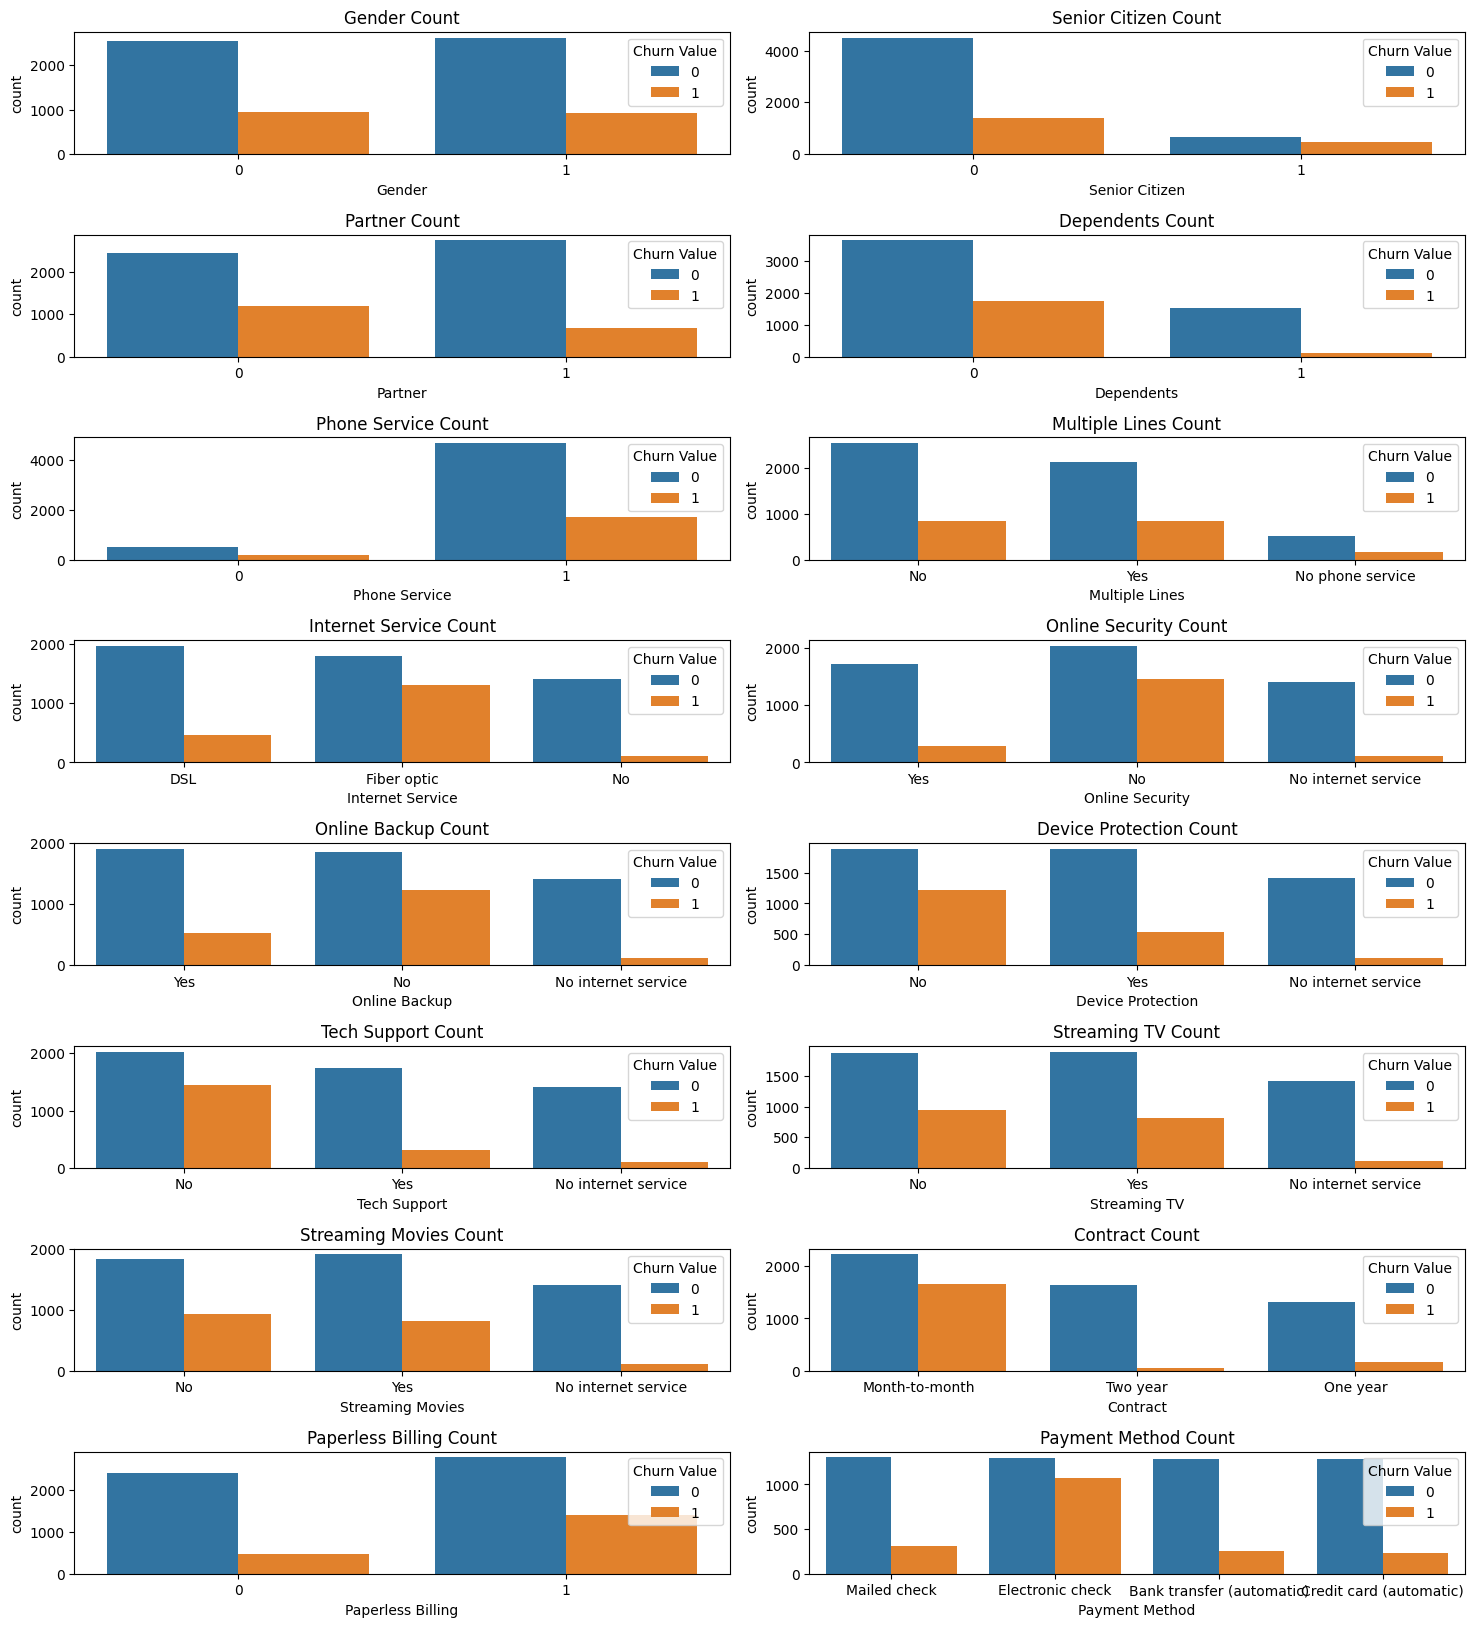

In [27]:
plt.figure(figsize=(15,20))
for i, c in enumerate(col):
    plt.subplot(10,2,(i+1))
    sns.countplot(data=df,x=c,hue="Churn Value")
    plt.xlabel(c)
    plt.title(f"{c} Count")
plt.tight_layout()
plt.show()    

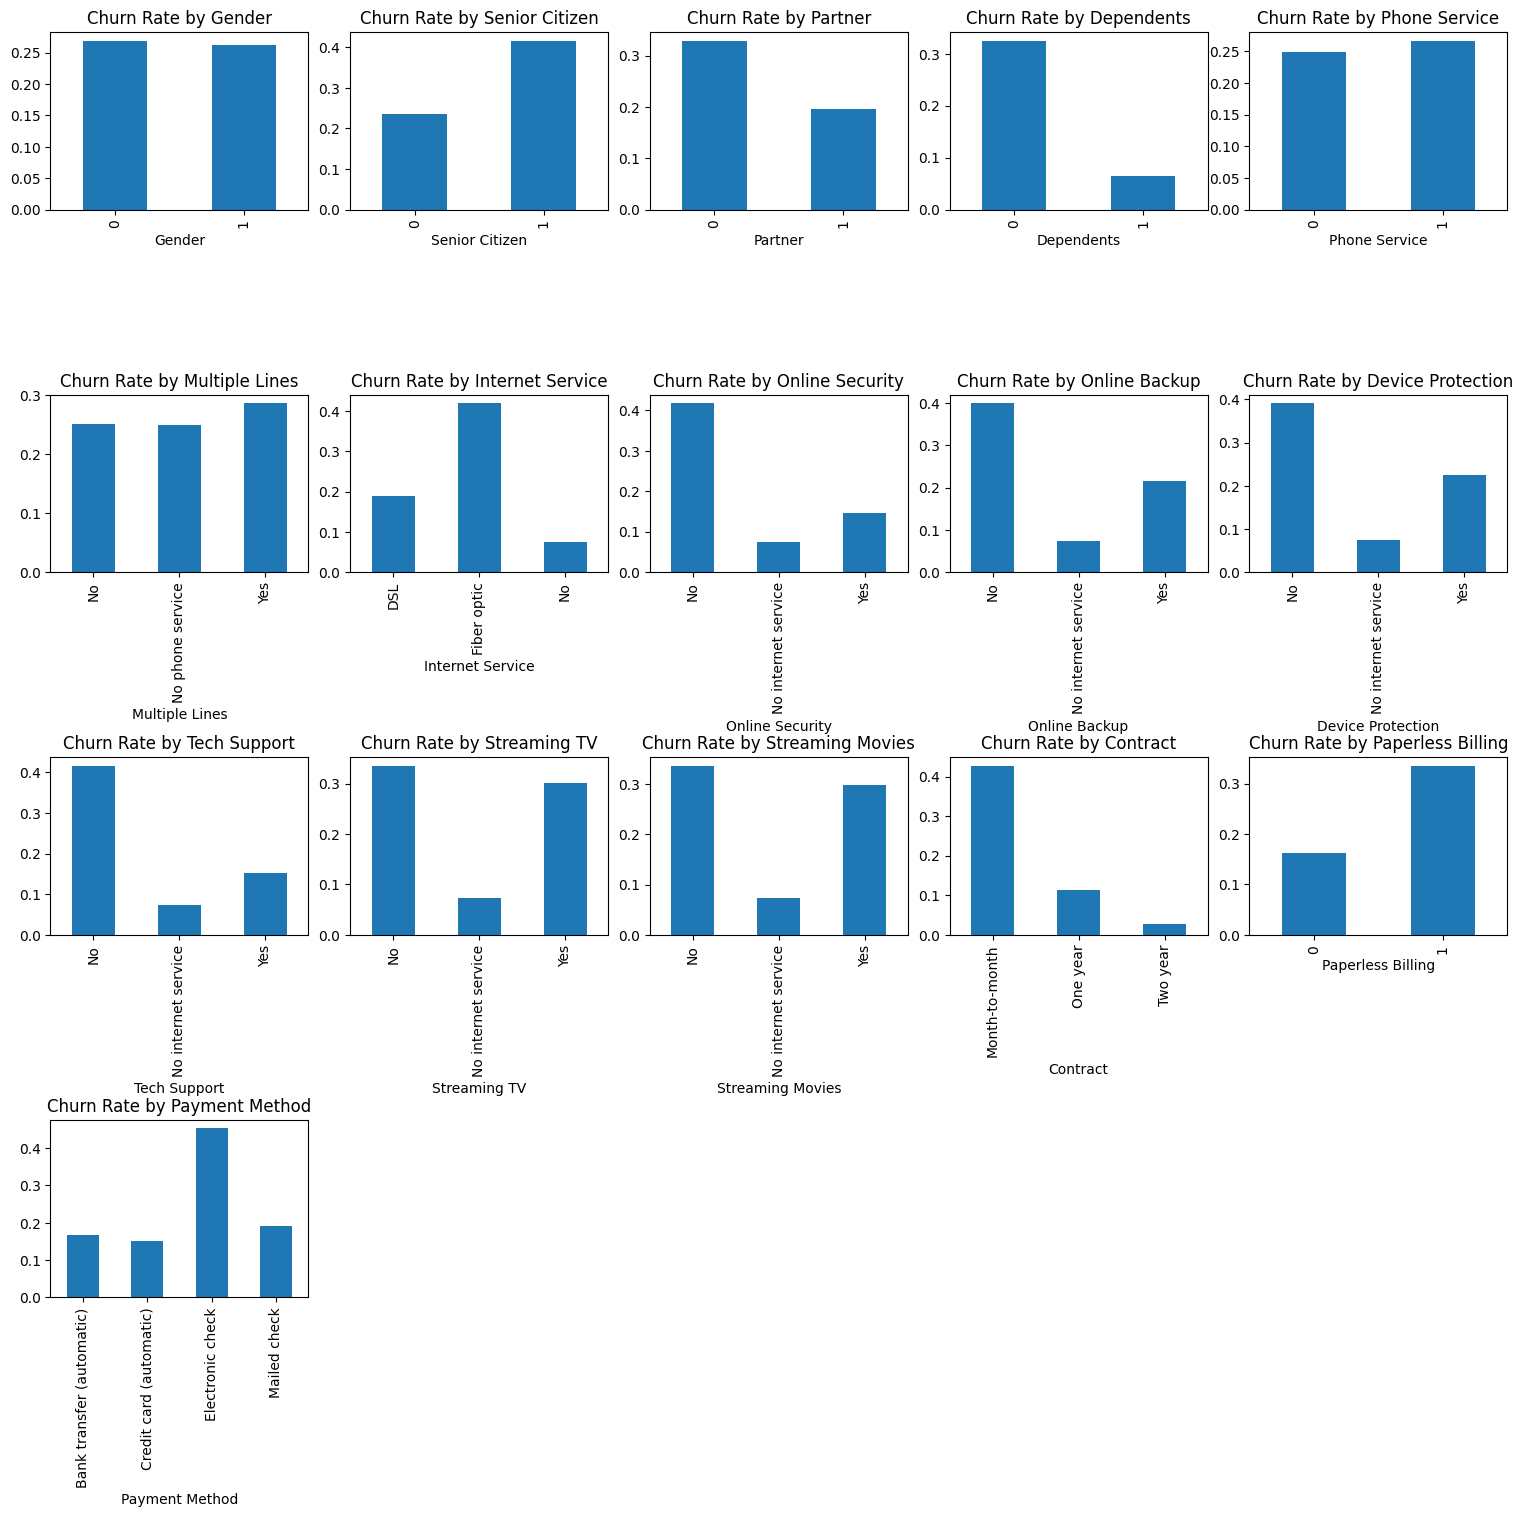

In [28]:
 plt.figure(figsize=(15,15))
for (i,c) in enumerate(col):
    plt.subplot(4,5,(i+1))
    df.groupby(c)["Churn Value"].mean().plot.bar()
    plt.title(f"Churn Rate by {c}")   
plt.tight_layout(pad=0.1)    
plt.show()

Observations:
* Clients with partners or dependents have a low churn rate.
* Clients with fiber optic iinternet services have a high churn rate.
* Clients have no online security have a high churn rate.
* Clients with no online internet backups have a high churn rate.
* Client with no internet protections and no tech support have a high churn rate.
* Clients with month-to-month contract have high churn rate.
* Clients with electronic check have a high churn rate.
* Also Clients with no internet serives have very low churn rate.

#### Top Churned Reason

<Axes: xlabel='Churn Reason'>

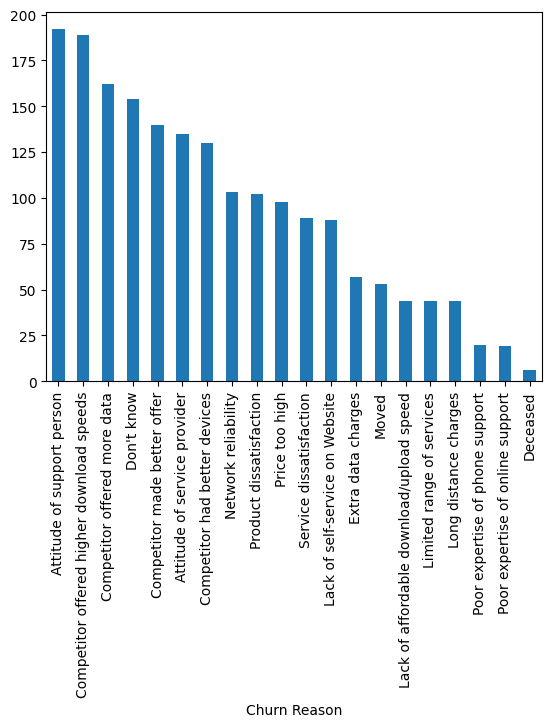

In [29]:
df.loc[~(df["Churn Reason"]=="Missing")].groupby("Churn Reason")["City"].count().sort_values(ascending=False).plot.bar()

In [30]:
a=df.loc[~(df["Churn Reason"]=="Missing")].groupby("Churn Reason")["City"].count()/df.loc[~(df["Churn Reason"]=="Missing")].shape[0]
print(f"The percentage for the top 5 reasons to churn is {np.round(a.iloc[:5].sum()*100,2)}%")
#a.sort_values(ascending=False).plot.bar()

The percentage for the top 5 reasons to churn is 42.05%


Observation:
Top 5 churned reasons are
1. Attitude of support person,
2. better speed from competitors,
3. More data from competitors,
4. don't know,
5. better offer from competitor,

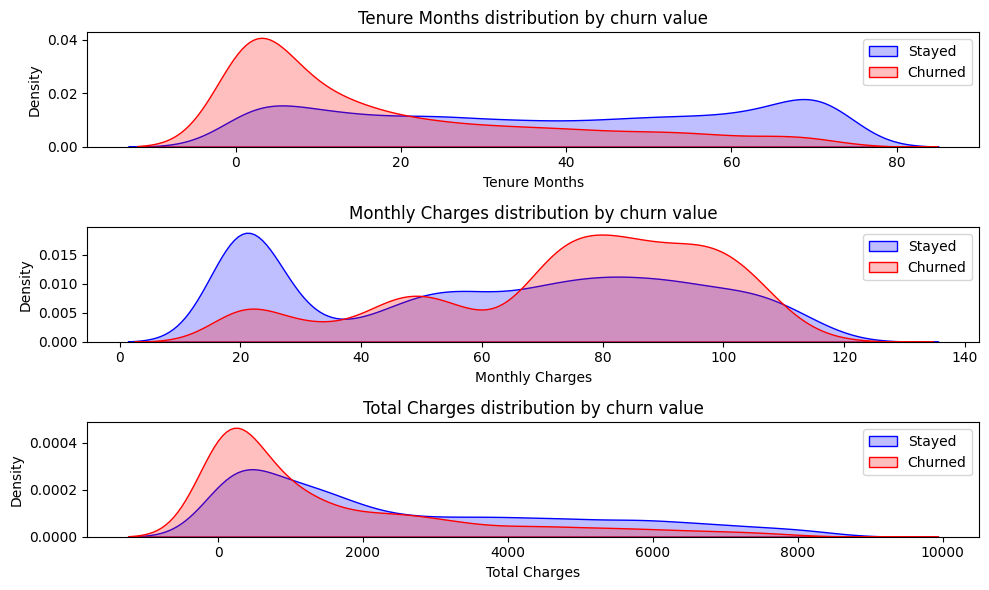

In [31]:
plt.figure(figsize=(10,6))
for (i,col) in enumerate(["Tenure Months","Monthly Charges","Total Charges"]):
    plt.subplot(3,1,(i+1))
    sns.kdeplot(df.loc[df["Churn Value"]==0],x=col,label="Stayed",color="b",fill=True)
    sns.kdeplot(df.loc[df["Churn Value"]==1],x=col,label="Churned",color="r",fill=True)
    plt.legend(loc="upper right")
    plt.title(f"{col} distribution by churn value")
plt.tight_layout()    
plt.show()    

Observation
* More people left when tenure month is under 20, but more people had churned after the tenure months of 20.
* More people stayed when monthly charges is under 40, but more people left when the monthly charges is over 70 per month.
* More people left when total charges is under 1000, and slighly more people stayed wile the total charges are over 1000.

## Part 2.2 Machine Learning -- LoisticRegression

In [32]:
data=df.drop(["Churn Reason","Churn Value","City"],axis=1)

#### OneHotEncoding with drop one category

In [33]:
col=data.select_dtypes("object").columns.tolist()
col_df=pd.get_dummies(data[col],drop_first=True)
dataX=pd.concat([data.drop(col,axis=1),col_df],axis=1)
dataX.head()
y=df["Churn Value"]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataX,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log=LogisticRegression(max_iter=5000,solver="saga",class_weight="balanced")
params={"C":np.arange(0.1,2.1,0.1),"penalty":["l1","l2"]}
grid_model=GridSearchCV(log,params)
grid_model.fit(X_train_std,y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, solver='saga'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'penalty': ['l1', 'l2']})

In [36]:
best_params=grid_model.best_params_
print(best_params)

{'C': np.float64(0.1), 'penalty': 'l2'}


In [37]:
log=LogisticRegression(**best_params,max_iter=5000,solver="saga",class_weight="balanced")
log.fit(X_train_std,y_train)

LogisticRegression(C=np.float64(0.1), class_weight='balanced', max_iter=5000,
                   solver='saga')

In [38]:
## Model Evaluation

In [39]:
def classification_metrics(X,y,model):
    from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, classification_report, precision_recall_curve, f1_score, roc_curve, auc
    y_pred=model.predict(X)
    score=accuracy_score(y,y_pred)
    precision=precision_score(y,y_pred)
    recall=recall_score(y,y_pred)
    f1=f1_score(y,y_pred)
    print(f"The accuracy score is {score}, the precision score is {precision}; the recall score is {recall}; f1_score is {f1}")
    report=classification_report(y,y_pred)
    print(report)
    cm=confusion_matrix(y,y_pred)
    print(f"Confusion Matrix is \n {cm}")
    plt.figure(figsize=(8,5))
    plt.subplot(221)
    sns.heatmap(cm,annot=True,fmt="g",cmap="RdBu",cbar=False)
    plt.title("Heatmap for Confusion Matrix")
   
    
    p_curve,r_curve, t_curve=precision_recall_curve(y,model.predict_proba(X)[:,1])
    plt.subplot(222)
    plt.plot(t_curve, p_curve[:-1],label="Precision")
    plt.plot(t_curve, r_curve[:-1],label="Recall")
    plt.xlabel("Prediction Threshold")
    plt.ylabel("Scores")
    plt.legend()
    plt.title("Precision-Recall-Curve")
   
    # f1-curve
    y_probs=model.predict_proba(X)[:,1]
    thresholds=np.linspace(0,1,100)    
    f1_scores=[f1_score(y,(y_probs>=threshold)) for threshold in thresholds]
    plt.subplot(223)
    plt.plot(thresholds,f1_scores)
    plt.xlabel("Threshold")
    plt.ylabel("F1 Score")
    plt.title("F1 Score")
    
    # ROC Curve
    fpr,tpr,thresholds=roc_curve(y,y_probs)
    auc_score=auc(fpr,tpr)
    plt.subplot(224)
    plt.plot([0,1],[0,1],"k--",label="Random Guess (AUC=0.5)")
    plt.plot(fpr,tpr, label=f"AUC={auc_score:.2f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC Curves for Different Models")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [40]:
print(f"The training accuracy is {log.score(X_train_std,y_train)}")
print(f"The testing accuracy is {log.score(X_test_std,y_test)}")

The training accuracy is 0.7598509052183173
The testing accuracy is 0.7487579843860894


The accuracy score is 0.7487579843860894, the precision score is 0.5383333333333333; the recall score is 0.8075; f1_score is 0.646
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1009
           1       0.54      0.81      0.65       400

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.80      0.75      0.76      1409

Confusion Matrix is 
 [[732 277]
 [ 77 323]]


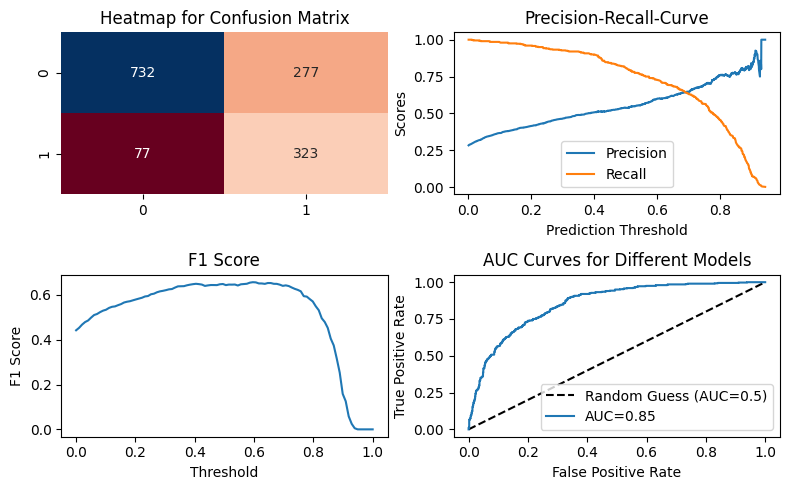

In [41]:
classification_metrics(X_test_std,y_test,log)

Observation:


#### Part 2.2 Machine Learning Model - DecisionTreeClassifier

In [42]:
col=data.select_dtypes("object").columns.tolist()
col_df=pd.get_dummies(data[col])
dataX=pd.concat([data.drop(col,axis=1),col_df],axis=1)
dataX.head()
y=df["Churn Value"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataX,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(class_weight="balanced")
params={
    "max_depth":[5,10,15,20],
    "min_samples_leaf":np.arange(5,21,5),
    "criterion":["entropy","gini"],
    
}
dt_grid=GridSearchCV(dt,params)
dt_grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': array([ 5, 10, 15, 20])})

In [44]:
best_params=dt_grid.best_params_
best_params

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': np.int64(15)}

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(**best_params,class_weight="balanced")
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=np.int64(15))

In [46]:
print(f"The training accuracy is {dt.score(X_train,y_train)}. The testing accuracy is {dt.score(X_test,y_test)}")
print("The model is overfit")

The training accuracy is 0.7928647497337593. The testing accuracy is 0.7281760113555713
The model is overfit


<Axes: xlabel='Scores', ylabel='Features'>

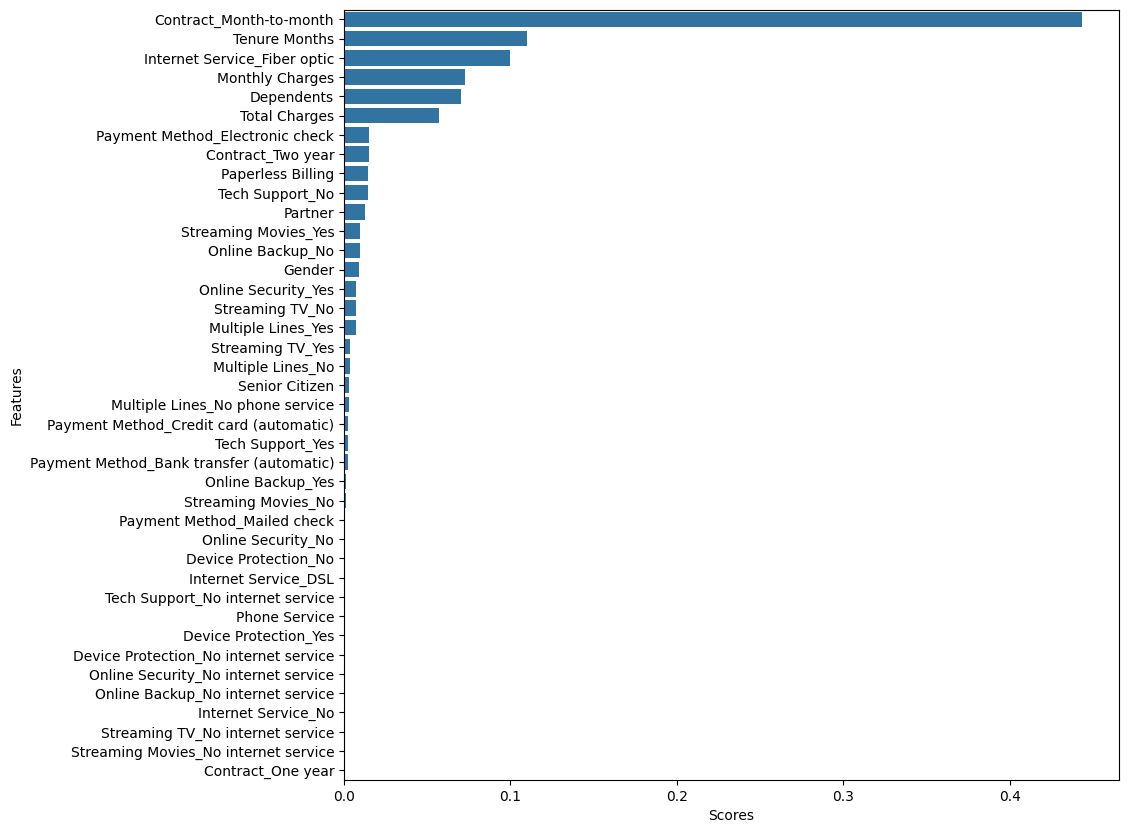

In [47]:
df_importance=pd.DataFrame({"Features":dataX.columns,"Scores":dt.feature_importances_})
plt.figure(figsize=(10,10))
sns.barplot(df_importance.sort_values("Scores",ascending=False),x="Scores",y="Features")

#### Pick the most 4 important features

In [48]:
feature_df=df[["Contract","Tenure Months","Internet Service","Dependents"]]
X=pd.get_dummies(feature_df)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# No scaling is necessary
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(class_weight="balanced")
params={
    "max_depth":[5,10,15,20],
    "min_samples_leaf":np.arange(5,21,5),
    "criterion":["entropy","gini"],
    
}
dt_grid=GridSearchCV(dt,params)
dt_grid.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': array([ 5, 10, 15, 20])})

In [50]:
best_params=dt_grid.best_params_
best_params

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': np.int64(15)}

The training accuracy is 0.7751153709620163. The testing accuracy is 0.7352732434350603. There is still overfitting
------------------------
The accuracy score is 0.7352732434350603, the precision score is 0.5224625623960066; the recall score is 0.785; f1_score is 0.6273726273726273
              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1009
           1       0.52      0.79      0.63       400

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409

Confusion Matrix is 
 [[722 287]
 [ 86 314]]


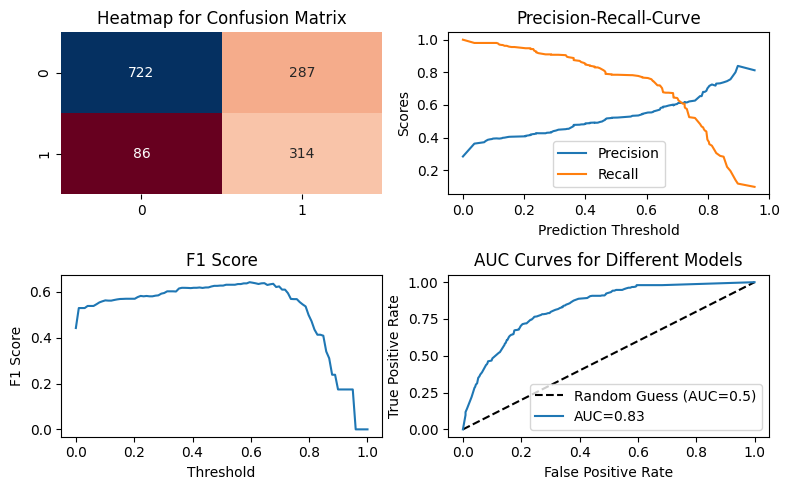

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(**best_params,class_weight="balanced")
dt.fit(X_train,y_train)
print(f"The training accuracy is {dt.score(X_train,y_train)}. The testing accuracy is {dt.score(X_test,y_test)}. There is still overfitting")
print("------------------------")
classification_metrics(X_test,y_test,dt)

#### Part 2.3 Machine Learning Moddel - DeepLearning Model

In [52]:
#### OnehotEncoding without dropping category

In [53]:
col=data.select_dtypes("object").columns.tolist()
col_df=pd.get_dummies(data[col])
dataX=pd.concat([data.drop(col,axis=1),col_df],axis=1)
dataX.head()
y=df["Churn Value"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataX,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [54]:
X_train_std.shape

(5634, 40)

In [55]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=10,activation="relu",input_shape=(40,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

C:\Users\Kun Bi\anaconda3\envs\Data_Science\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [58]:
epoch_hist=model.fit(X_train_std,y_train,epochs=50, batch_size=50)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.6034 - loss: 0.6599
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.7389 - loss: 0.4850
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.7649 - loss: 0.4479
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7946 - loss: 0.4326
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.7816 - loss: 0.4217
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.7901 - loss: 0.4132
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.7909 - loss: 0.4207
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8038 - loss: 0.4045
Epoch 9/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.7917 - loss: 0.4087
Epoch 10/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8015 - loss: 0.4079
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.8068 - loss: 0.4046
Epoch 12/50
113/113 ━━━━━━━━━━

In [59]:
y_train_pred=model.predict(X_train_std)
y_train_pred=(y_train_pred>0.5).astype("int")
y_pred=model.predict(X_test_std)
y_pred=(y_pred>0.5).astype("int")

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step


The training accuracy score is 0.8255236066737665
The testing accuracy score is 0.8019872249822569
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1009
           1       0.70      0.53      0.60       400

    accuracy                           0.80      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.79      0.80      0.79      1409



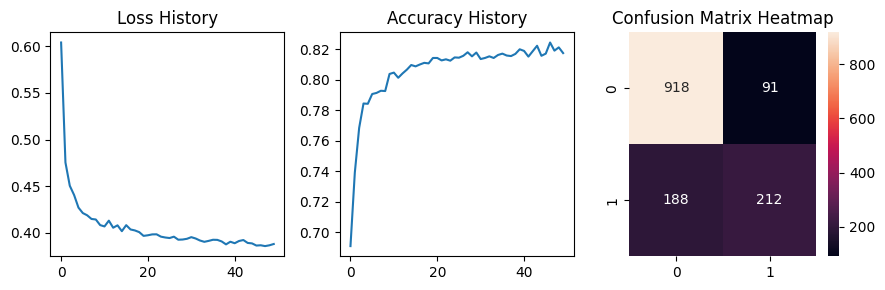

In [60]:
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import confusion_matrix,classification_report
print(f"The training accuracy score is {score(y_train,y_train_pred)}")
print(f"The testing accuracy score is {score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.plot(epoch_hist.history["loss"])
plt.title("Loss History")
plt.subplot(132)
plt.plot(epoch_hist.history["accuracy"])
plt.title("Accuracy History")
plt.subplot(133)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="g")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

#### Part 3 Machine Learning Model - KMeans Clustering

In [61]:
data_cluster=dataX.astype("int")
# KMeans Clustering model is not affected by multi-colinearity
X=data_cluster

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

### Fit the KMeans Model with the Churn Value features

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia_lst=[]
silhouette_lst=[]
for n in range(2,16):
    kmeans=KMeans(n_clusters=n,n_init=10,random_state=42)
    kmeans.fit(X_std)
    inertia_lst.append(kmeans.inertia_)
    silhouette_lst.append(silhouette_score(X_std,kmeans.labels_))
    

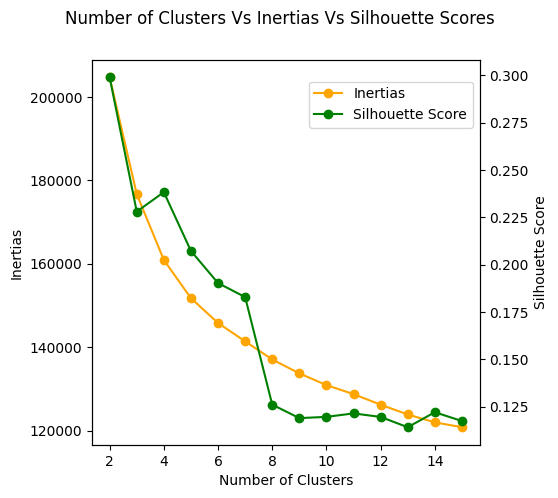

In [63]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(
    range(2,16),
    inertia_lst,
    label="Inertias",
    c="orange",
    marker="o"
)
ax.set_ylabel("Inertias")
ax.set_xlabel("Number of Clusters")
ax2=ax.twinx()
ax2.plot(
    range(2,16),
    silhouette_lst,
    label="Silhouette Score",
    c="green",
    marker="o"
)
ax2.set_ylabel("Silhouette Score")
fig.suptitle("Number of Clusters Vs Inertias Vs Silhouette Scores")
fig.legend(bbox_to_anchor=(0.9,0.85))
plt.show()

**Observations**:
* When the number of clusters are 2, 3, and 4, the silhouette scores are the highest.
* Set n_cluster=2,3,and 4 respectively.

## n_cluster=2

In [64]:
kmeans2=KMeans(n_clusters=2,n_init=10,random_state=42)
kmeans2.fit(X_std)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [65]:
from collections import Counter
Counter(kmeans2.labels_)

Counter({np.int32(1): 5517, np.int32(0): 1526})

In [66]:
centers2=pd.DataFrame(kmeans2.cluster_centers_,columns=data_cluster.columns)

In [67]:
centers2.style.background_gradient(axis=0)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0.011457,-0.347466,0.001170,0.327250,-0.074273,0.327438,-0.610375,-1.451744,-0.711626,0.589523,-0.327438,-0.400366,-0.723740,-0.885660,1.901403,-0.993349,1.901403,-0.633933,-0.883620,1.901403,-0.725563,-0.885405,1.901403,-0.723968,-0.986321,1.901403,-0.639439,-0.814759,1.901403,-0.790132,-0.808742,1.901403,-0.796070,-0.415720,0.072261,0.415035,-0.004018,0.001958,-0.541741,0.611036
1,-0.003169,0.096109,-0.000324,-0.090517,0.020544,-0.090569,0.168830,0.401552,0.196835,-0.163062,0.090569,0.110741,0.200186,0.244973,-0.525927,0.274760,-0.525927,0.175346,0.244409,-0.525927,0.200690,0.244903,-0.525927,0.200249,0.272816,-0.525927,0.176868,0.225362,-0.525927,0.218550,0.223698,-0.525927,0.220193,0.114988,-0.019987,-0.114798,0.001111,-0.000542,0.149845,-0.169012


**Observation**:
* Cluster 0: Slightly older, Have dependents, have phone service, No multiple lines, No internet services, more two year contract, use mail checks.
* Cluster 1: High in Charges, have internet fiber optic and DSL, Slightly Longer Tenure Months, Use Electronic checks, Higher Total Chargers.
* Customers can be clustered into two groups. They are with customers with internet and customers without internet.

**In summary**:
* Cluster 0: Low internet engagement customers
* Cluster 1: High internet enegagement customers

In [68]:
cluster2=pd.Series(kmeans2.labels_,name="Cluster2")
df=pd.concat([df,cluster2],axis=1)
df["Cluster2_Labels"]=df.Cluster2.map({0:"No Internet Customers", 1:"Internet Customers"})
df.groupby("Cluster2_Labels")["Churn Value"].mean()

Cluster2_Labels
Internet Customers       0.318289
No Internet Customers    0.074050
Name: Churn Value, dtype: float64

## Observations:
* It makes sense, since internet users have high charges, longer tenure months. That's probably why internet users have the highest churn rate.

## n_cluster=3

In [69]:
kmeans3=KMeans(n_clusters=3, n_init=10,random_state=42)
kmeans3.fit(X_std)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [70]:
from collections import Counter
Counter(kmeans3.labels_)

Counter({np.int32(0): 3146, np.int32(2): 2371, np.int32(1): 1526})

In [71]:
centers3=pd.DataFrame(kmeans3.cluster_centers_,columns=data_cluster.columns)
#plt.figure(figsize=(50,10))
centers3.style.background_gradient(axis=0)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,-0.001564,0.136342,-0.305510,-0.213892,-0.639177,-0.134890,0.191825,0.125423,-0.496660,0.066323,0.134890,-0.147877,0.192082,0.252729,-0.525927,0.604779,-0.525927,-0.189546,0.613298,-0.525927,-0.184394,0.689303,-0.525927,-0.264094,0.646902,-0.525927,-0.235207,0.609853,-0.525927,-0.168506,0.601785,-0.525927,-0.159190,0.722024,-0.323485,-0.532479,-0.193261,-0.182040,0.375637,-0.053606
1,0.011457,-0.347466,0.001170,0.327250,-0.074273,0.327438,-0.610375,-1.451744,-0.711626,0.589523,-0.327438,-0.400366,-0.723740,-0.885660,1.901403,-0.993349,1.901403,-0.633933,-0.883620,1.901403,-0.725563,-0.885405,1.901403,-0.723968,-0.986321,1.901403,-0.639439,-0.814759,1.901403,-0.790132,-0.808742,1.901403,-0.796070,-0.415720,0.072261,0.415035,-0.004018,0.001958,-0.541741,0.611036
2,-0.005297,0.042764,0.404319,0.073064,0.895258,-0.031805,0.138340,0.767667,1.116331,-0.467200,0.031805,0.453640,0.210932,0.234690,-0.525927,-0.162808,-0.525927,0.659150,-0.244696,-0.525927,0.711268,-0.344322,-0.525927,0.815914,-0.223179,-0.525927,0.723233,-0.284428,-0.525927,0.731742,-0.277602,-0.525927,0.723211,-0.689871,0.382415,0.438998,0.258827,0.240104,-0.149528,-0.322028


**Observations**:
* Cluster 0: Older citizen, lots of paperless billing, no phone services, DSL and fiber optic internet, No online security services, No online backups, no device protections, no tech support, No streamings, month-to-month contract, electronic payment,
* Cluster 1: Slightly more males, more with a dependent, lots of phone services, low monthly charges and total charges, single phone service, No internet services, less one year contract, lots of two year contract, lots of mailed check payment.
* Cluster 2: More with a partner, have long tenure months, more paperless billing, high monthly charges and total charges, multiple phone line services, DSL and fiber optic internet, have online security services, have online backups, have device protections, have tech support, have streamings, lots of one year contract, lots of two year contracts, bank transfer payment and card payment, 


**In Summary**:
* Cluster 0: Most have Phone Service, Internet with less Internet Services. Medium Charges.
* Cluster 1: Everyone has phone services, No Internet Services. Low Charges.
* Cluster 2: Most have phone services. Internet with lots of Internet Servies. High Charges.

In [72]:
cluster3=pd.Series(kmeans3.labels_,name="Cluster3")
df=pd.concat([df,cluster3],axis=1)
df["Cluster3_Labels"]=df.Cluster3.map({0:"0. Most Phone Services and Internet with less online Services. Medium Charges.", 
                                       1:"1. Everyone has phone services, No Internet Services. Low Charges.",
                                      2:"2. Most Phone Services and Internet with lots of online Servies. High Charges."})


In [73]:
g=df.groupby(["Cluster3","Cluster3_Labels"])["Churn Value"].mean()
g

Cluster3  Cluster3_Labels                                                               
0         0. Most Phone Services and Internet with less online Services. Medium Charges.    0.451685
1         1. Everyone has phone services, No Internet Services. Low Charges.                0.074050
2         2. Most Phone Services and Internet with lots of online Servies. High Charges.    0.141291
Name: Churn Value, dtype: float64

In [74]:
g_df=g.to_frame().rename(columns={"Churn Value":"Churn Rate"})
g_df

,,Churn Rate
Cluster3,Cluster3_Labels,
0,0. Most Phone Services and Internet with less online Services. Medium Charges.,0.451685
1,"1. Everyone has phone services, No Internet Services. Low Charges.",0.074050
2,2. Most Phone Services and Internet with lots of online Servies. High Charges.,0.141291


**Observations**:
* Cluster 0 has the highest churn rate since customers are older, they have little use both phone and internet even though they have both.
* Cluster 1 has the lowest churn rate as thay don't have internet, but they have lots of single line phone services. Yhey are taking full advantage of their phone services. And their charges are the lowest.
* Cluster 2 has a medium churn rate. They have both internet and phone services and lots of online services. And they have high charges. Cluster 2 have partners who can share the high costs and have the services longer.

## n_cluster=4

In [75]:
kmeans4=KMeans(n_clusters=4, n_init=10,random_state=42)
kmeans4.fit(X_std)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [76]:
from collections import Counter
Counter(kmeans4.labels_)

Counter({np.int32(0): 2741,
         np.int32(2): 2094,
         np.int32(1): 1526,
         np.int32(3): 682})

In [77]:
centers4=pd.DataFrame(kmeans4.cluster_centers_,columns=data_cluster.columns)
#plt.figure(figsize=(50,10))
centers4.style.background_gradient(axis=0)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,-0.001484,0.150227,-0.304927,-0.233767,-0.650455,0.327438,0.220810,0.301974,-0.461030,0.229473,-0.327438,-0.036089,0.001642,0.434965,-0.525927,0.613986,-0.525927,-0.199726,0.624199,-0.525927,-0.195773,0.689694,-0.525927,-0.264502,0.667850,-0.525927,-0.258282,0.590873,-0.525927,-0.149400,0.592316,-0.525927,-0.149689,0.746453,-0.343746,-0.541632,-0.186729,-0.190750,0.411065,-0.091330
1,0.011457,-0.347466,0.001170,0.327250,-0.074273,0.327438,-0.610375,-1.451744,-0.711626,0.589523,-0.327438,-0.400366,-0.723740,-0.885660,1.901403,-0.993349,1.901403,-0.633933,-0.883620,1.901403,-0.725563,-0.885405,1.901403,-0.723968,-0.986321,1.901403,-0.639439,-0.814759,1.901403,-0.790132,-0.808742,1.901403,-0.796070,-0.415720,0.072261,0.415035,-0.004018,0.001958,-0.541741,0.611036
2,-0.012855,0.065143,0.415558,0.067990,0.913214,0.327438,0.172215,0.908349,1.233514,-0.415931,-0.327438,0.616893,0.075226,0.364550,-0.525927,-0.137005,-0.525927,0.630621,-0.265073,-0.525927,0.732539,-0.331446,-0.525927,0.802461,-0.209159,-0.525927,0.707788,-0.301062,-0.525927,0.748487,-0.297190,-0.525927,0.742866,-0.674195,0.394168,0.409573,0.254658,0.240375,-0.139973,-0.328931
3,0.019813,-0.026192,-0.054073,-0.001908,-0.025801,-3.054010,-0.050406,-0.755188,-0.344645,-0.963330,3.054010,-0.854176,1.381712,-0.885660,-0.525927,0.176765,-0.525927,0.283695,0.283616,-0.525927,0.159762,0.228366,-0.525927,0.217528,0.166281,-0.525927,0.294222,0.373980,-0.525927,0.068940,0.342825,-0.525927,0.100657,0.002267,0.008523,-0.010747,-0.023077,0.023581,-0.009351,0.010136


**Observatioins**
* Cluster 0: Slightly Older, have phone services, have paperless billing, medium high monthly charges, medium No Multiple lines, fiber optics, No Online security, No Online Backups, No Devices Protections, No tech support, No streaming, contract monthly, electronic transfer
* Cluster 1: More have dependents, have phone services, very low monthly charges, No multiple lines, No Internet Services, contract two year,mailed check
* Cluster 2: More Have a Partner, have long tenure months, have phone services, have paperless billing, high monthly charges, High total charges, Lots of phone services, fiber optics, lots of online security, lots of online backups, Lots of device protections, lots of tech support, lots of streaming, contract one year, contract two year, bank transfer(automatic), card transfer(automatic)
* Cluster 3: No Phone services, low monthly charges, No multi-lines Phone services, DSL, medium online security, medium online backups, medium device protections,
  medium tech support,.

**In Summary**
* Cluster 0: have phone services and internet, no internet related services, medium charges.
* Cluster 1: have dependent,have phone services and no internet, mailed checks.
* Cluster 2: have partners, long tenure months, have phone services,  high charges, and high internet related services
* Cluster 3: No Phone services, have DSL, medium level internet related services.

In [78]:
cluster4=pd.Series(kmeans4.labels_,name="Cluster4")
df=pd.concat([df,cluster4],axis=1)
df["Cluster4_Labels"]=df.Cluster4.map({0:"have phone services and internet, no internet related services, medium charges.", 
                                       1:"have dependent,have phone services and no internet, mailed checks.",
                                      2:"have partners, long tenure months, have phone services, high charges, and high internet related services",
                                      3:" No Phone services, have DSL, medium level internet related services."})


**Observation**
* Cluster 0 have the highest churn rate. they have both phone and internet services, but with medium level of internet related services that they don't need. That's why people are leaving.
* Cluster 1: Lowest churn rate. They only have phone services and dependent. They get what they need.
* Cluster 2: Have the highest charges. They have partners who can share the cost.
* Cluster 3: Second highest churn rate. Some of them have internet related services, but they have no partners. It's difficult to maintain such a high cost. 

In [79]:
df.groupby(["Cluster2","Cluster3","Cluster4"])["Churn Value"].mean()

Cluster2  Cluster3  Cluster4
0         1         1           0.074050
1         0         0           0.466863
                    3           0.355814
          2         0           0.200000
                    2           0.149475
                    3           0.067460
Name: Churn Value, dtype: float64

**In Conclusion**
* Cluster 4 groups are over clusterings. Some of the 3 clusters are similar to each other. Therefore, Cluster 3 is much more appropriate.
* Set n_cluster=3

#### Plot histograms for a variety of clusters

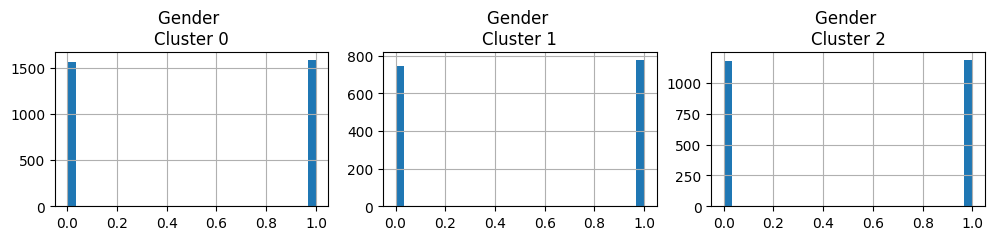

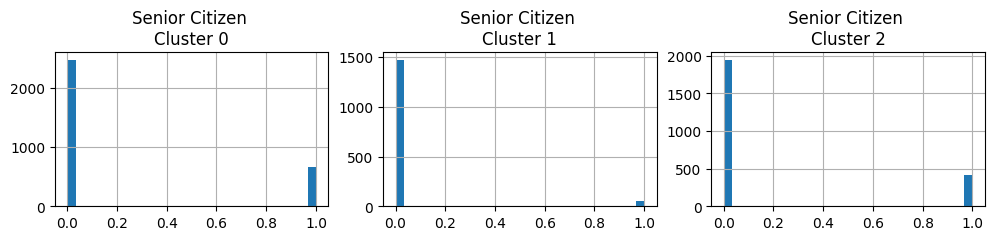

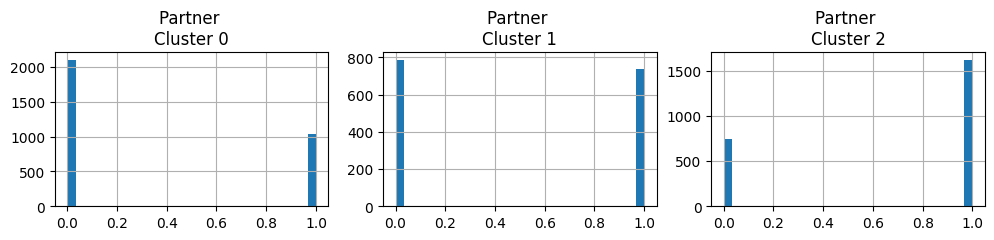

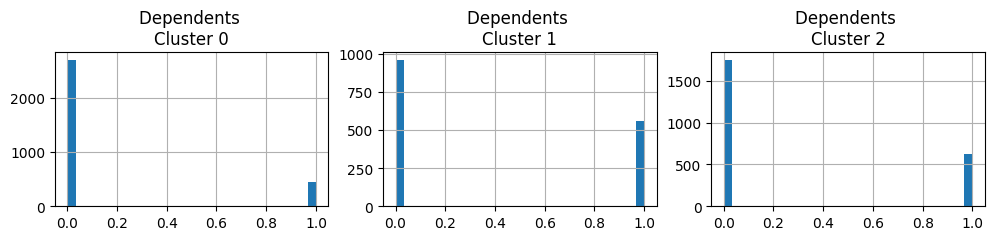

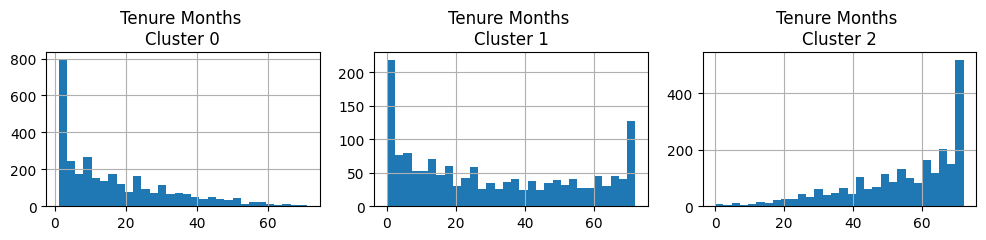

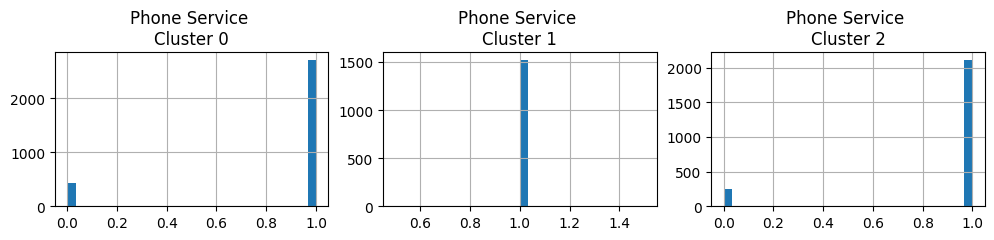

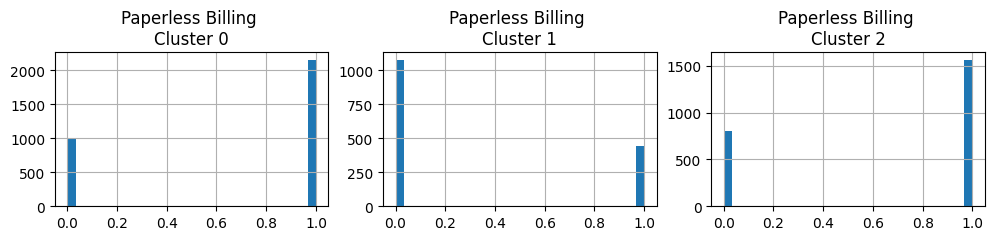

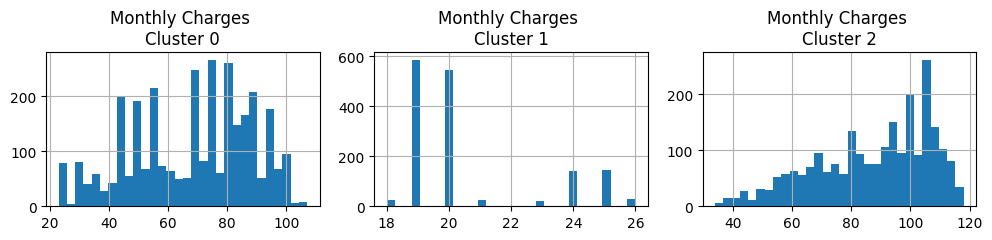

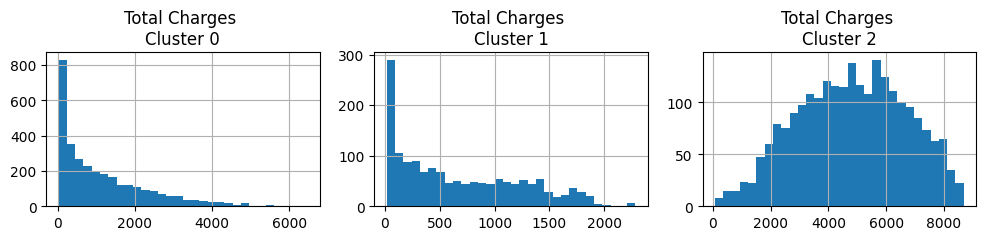

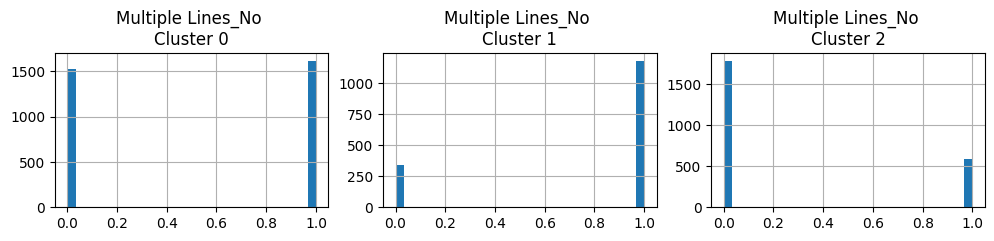

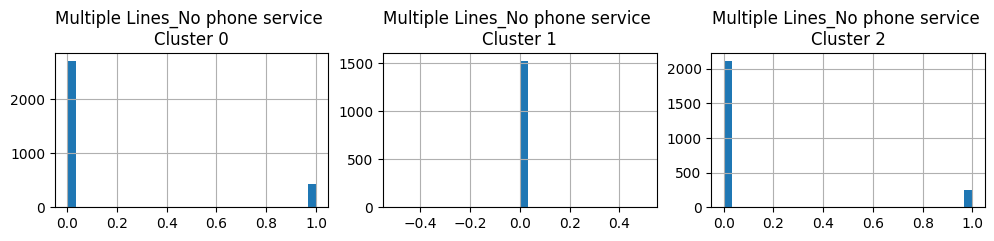

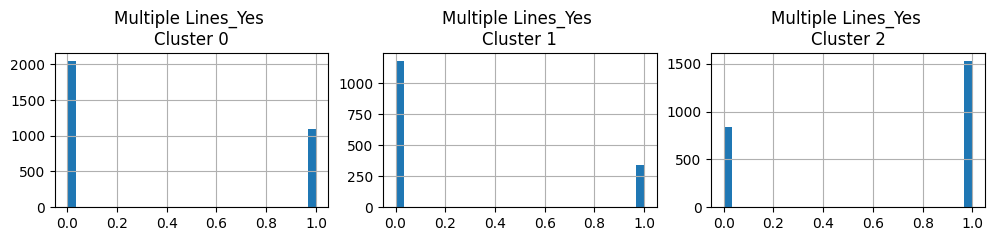

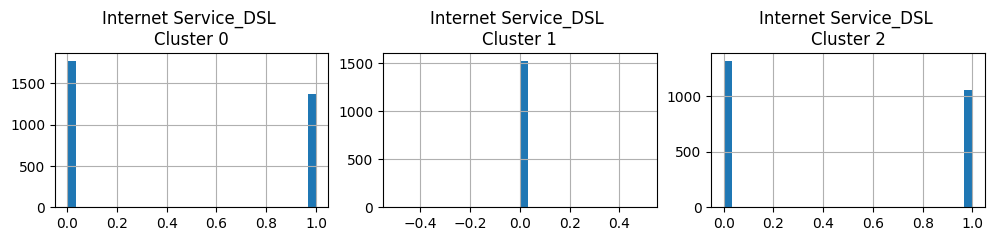

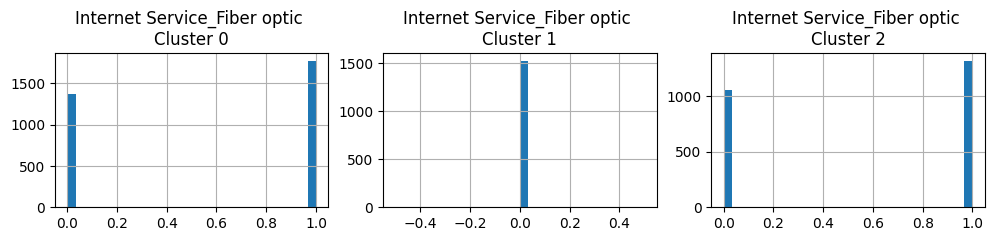

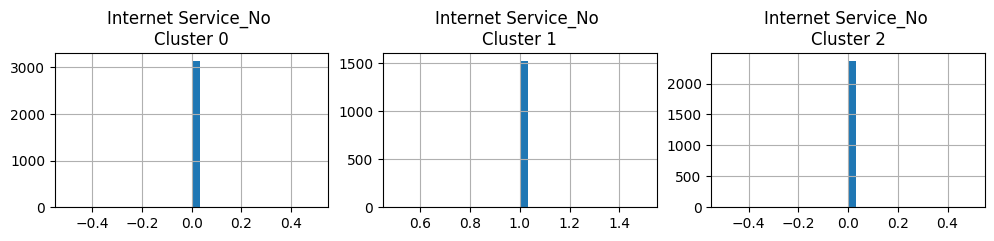

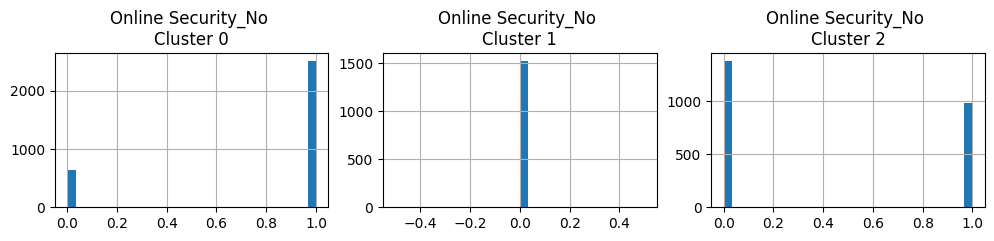

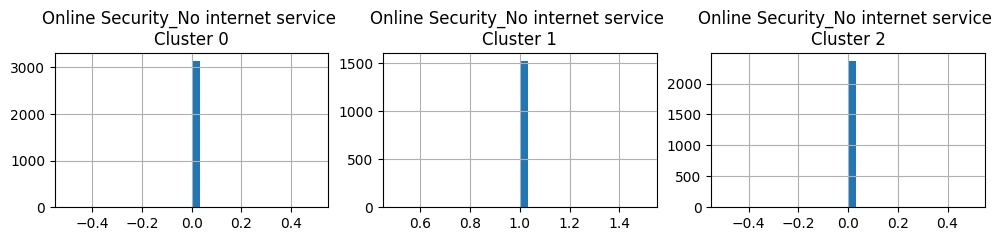

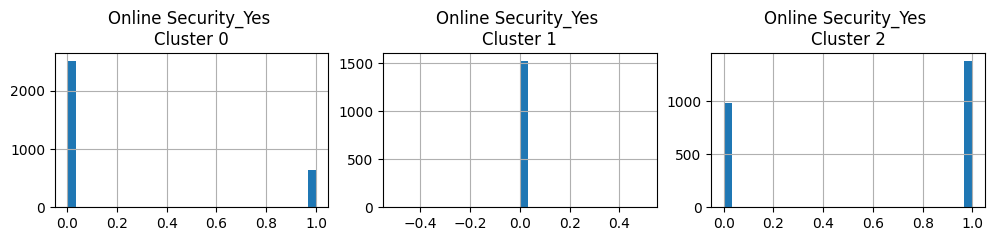

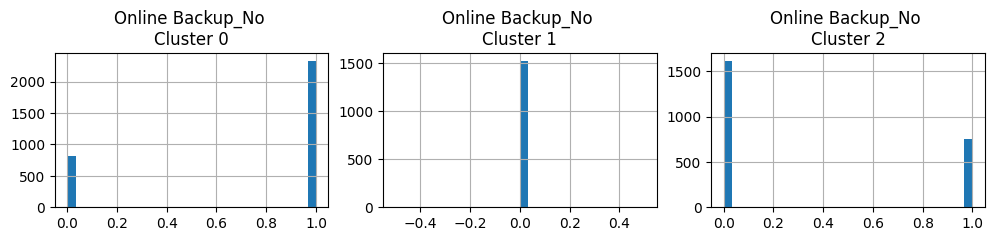

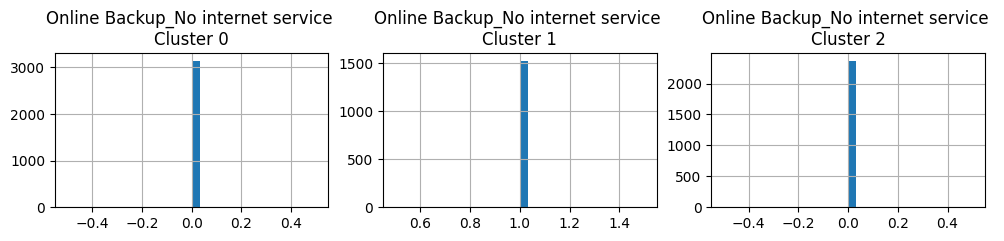

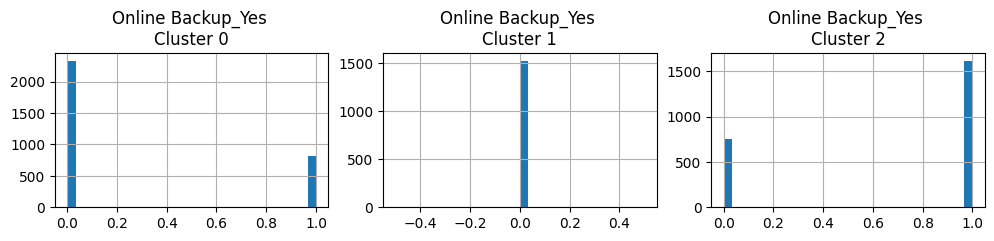

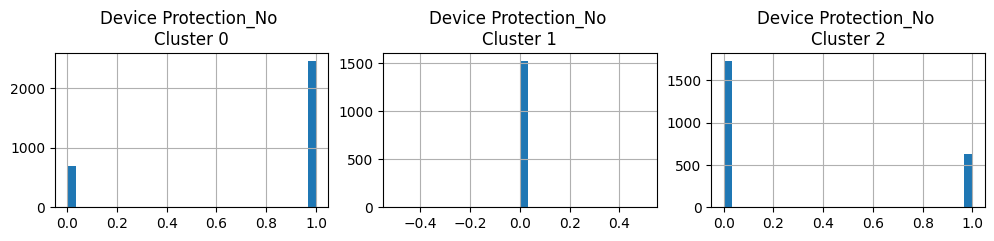

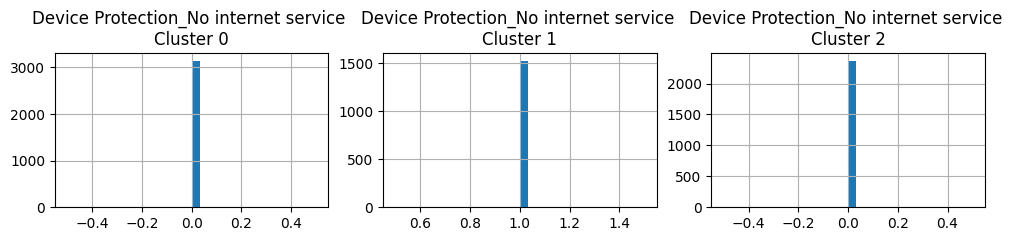

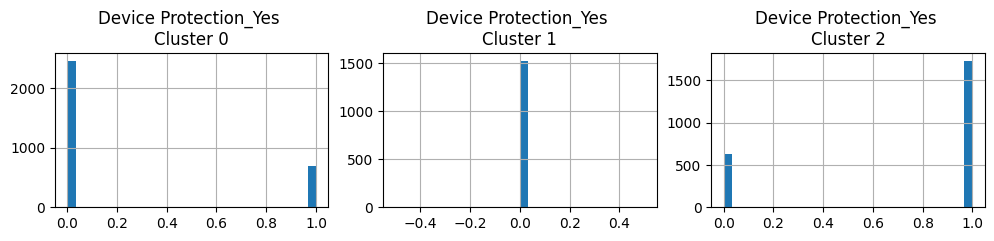

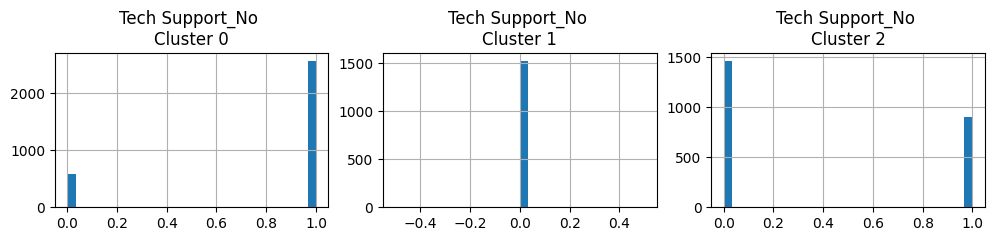

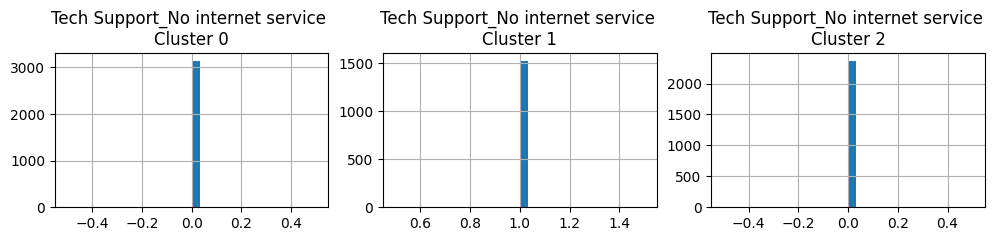

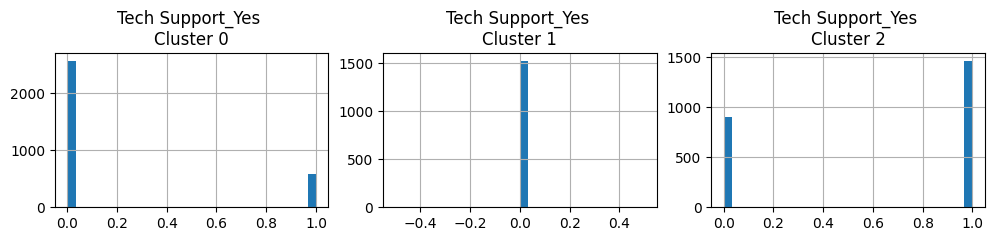

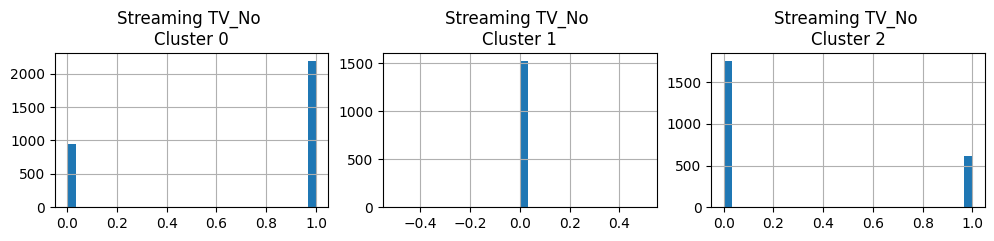

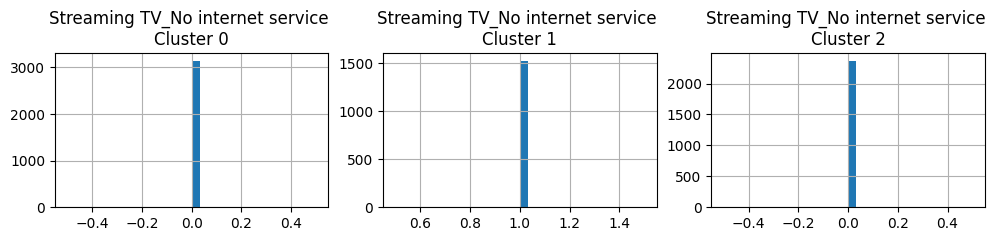

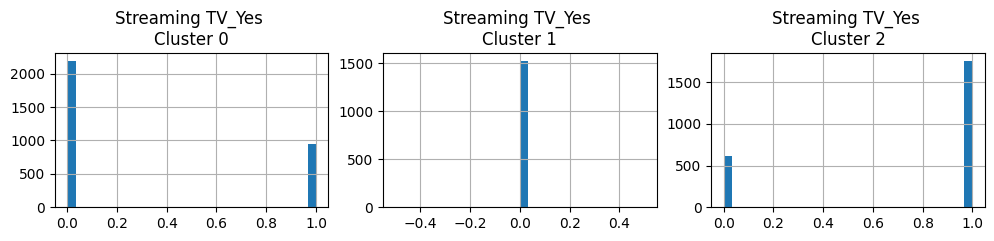

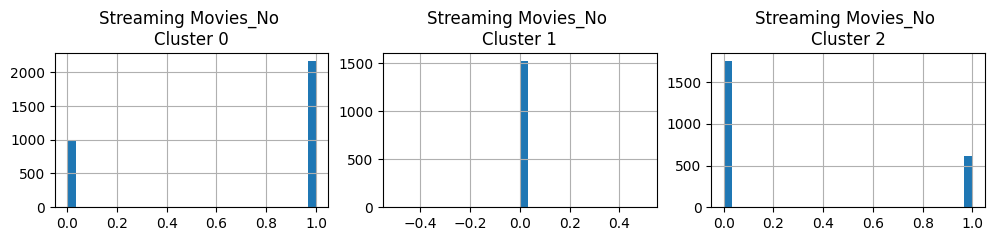

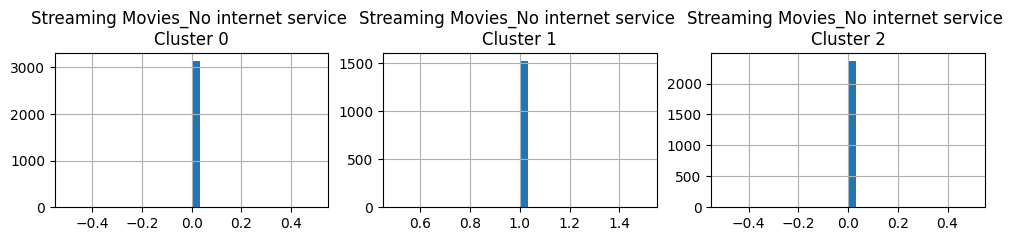

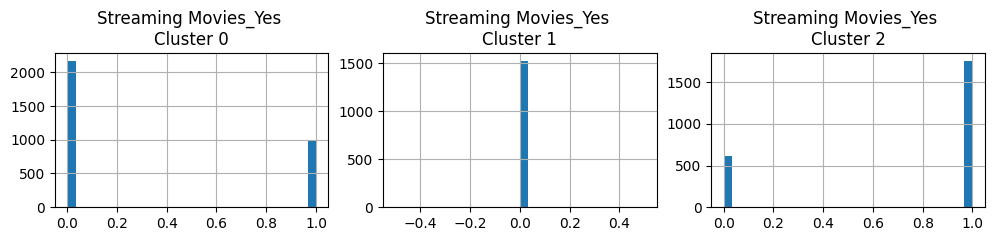

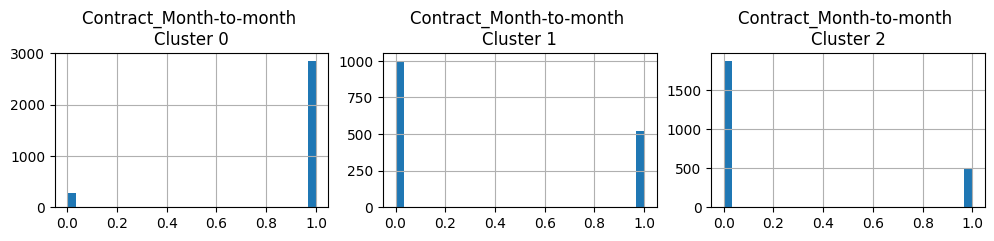

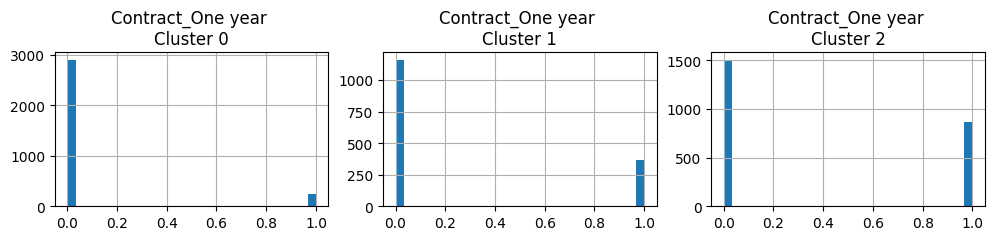

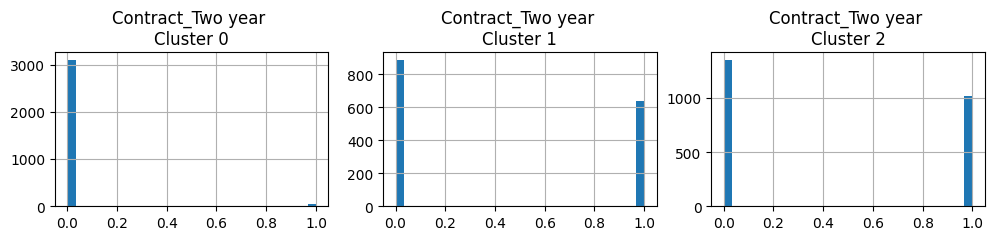

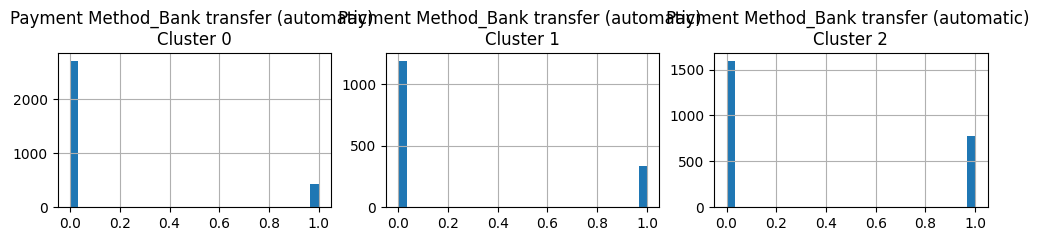

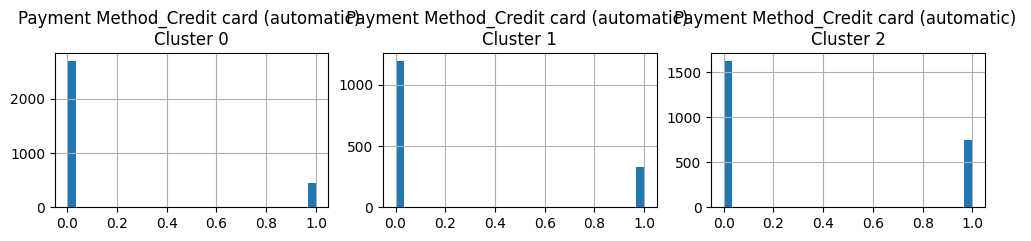

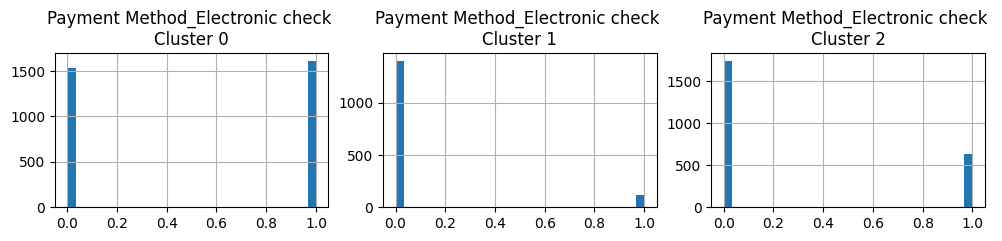

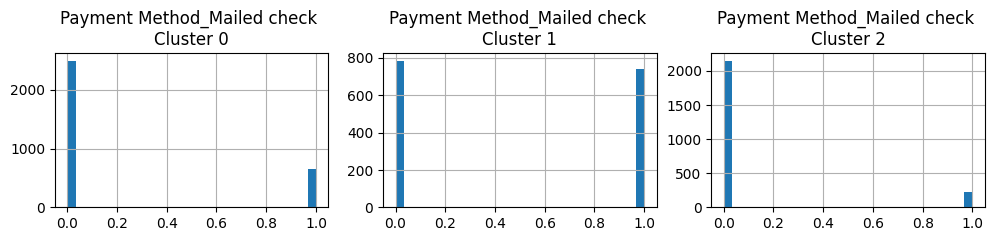

In [80]:
d=pd.concat([data_cluster,df.Cluster3],axis=1)
for col in data_cluster.columns:
    plt.figure(figsize=(12,2))
    for n in range(3):
        plt.subplot(1,3,n+1)
        cluster=d.query("Cluster3==@n")
        cluster[col].hist(bins=30)
        plt.title(f"{col} \nCluster {n}")
            
    plt.show()
        

## Visualization in PCA with 3 Clusters

In [81]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [82]:
pca.explained_variance_ratio_
# The first two components cover 0ver 40% of the variances of the datasets

array([0.27878861, 0.14331138])

In [83]:
pca_df=pd.DataFrame(pca.components_,columns=data_cluster.columns)
pca_df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0.002420,-0.071339,-0.003196,0.060319,-0.023481,0.041829,-0.114612,-0.246840,-0.129347,0.116057,...,-0.108144,0.295463,-0.141291,-0.069474,0.013229,0.068263,-0.001507,0.000618,-0.103776,0.117539
1,-0.004234,-0.017990,0.173073,0.079413,0.343442,0.039762,-0.010236,0.138226,0.332954,-0.137370,...,-0.206239,0.018790,0.191060,-0.301467,0.105995,0.249982,0.106346,0.111421,-0.121797,-0.076970


In [84]:
pca_df.T

,0,1
Gender,0.002420,-0.004234
Senior Citizen,-0.071339,-0.017990
Partner,-0.003196,0.173073
Dependents,0.060319,0.079413
Tenure Months,-0.023481,0.343442
Phone Service,0.041829,0.039762
Paperless Billing,-0.114612,-0.010236
Monthly Charges,-0.246840,0.138226
Total Charges,-0.129347,0.332954
Multiple Lines_No,0.116057,-0.137370


**Observation**:
* Component 1: <- Higher charges, Electronic Check, Mailed Check | No Internet Services ->
* Component 2: <- No Internet related services, Monthly Contract, electronic and mailed checks   |      Have Partner and dependents, Longer Tenure Months, Higher Charges, Lots of Internet related Services, Yearly Contract, Automatic transfers ->

In [85]:
pca_scaled_df=pd.DataFrame(pca.transform(X_std), columns=["PC1","PC2"])
pca_scaled_df.head(2)


,PC1,PC2
0,-0.726159,-2.703493
1,-1.537688,-3.901569


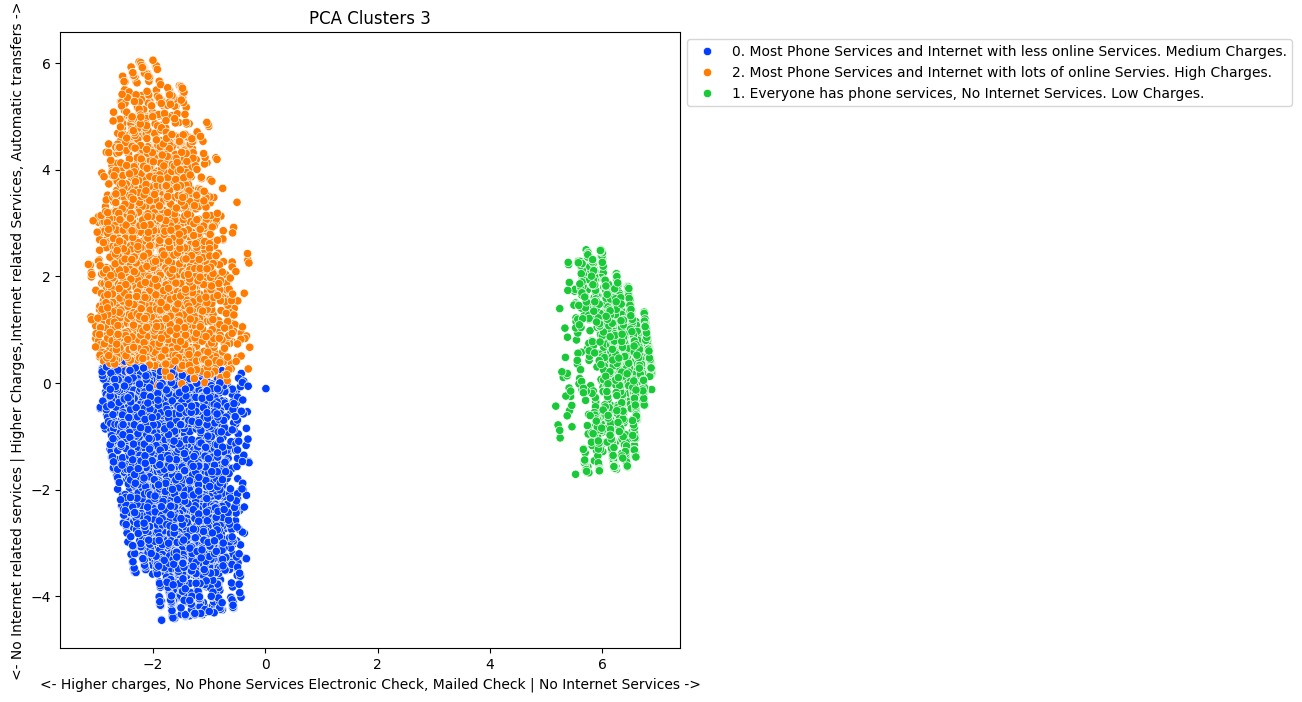

In [86]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="PC1",y="PC2",data=pca_scaled_df,hue=df.Cluster3_Labels,palette="bright")
plt.xlabel("<- Higher charges, No Phone Services Electronic Check, Mailed Check | No Internet Services ->")
plt.ylabel("<- No Internet related services | Higher Charges,Internet related Services, Automatic transfers ->")
plt.legend(bbox_to_anchor=(1,1))
plt.title("PCA Clusters 3")
plt.show()

**Observations**
* This makes perfect senses. As x axis goes right, the chart shows clients with no internet services reflecting cluster green. As x-axis goes left, it shows clients with higher charges reflecting cluster orange and cluster blue.
* As the y axis goes down, it shows clients with little to no online services as blue cluster. As the y axis goes up, it reflects clusters with high charges and lots of internet related services as orange cluster.
* To Recap, green cluster or cluster1 has phone serive but no internet services with low charges. Blue CLuster or cluster 0 has no phone but internet with little online services with medium charges. Orange Cluster or Cluster 2 has internet services and lots of online services with high cost

In [87]:
g_df

,,Churn Rate
Cluster3,Cluster3_Labels,
0,0. Most Phone Services and Internet with less online Services. Medium Charges.,0.451685
1,"1. Everyone has phone services, No Internet Services. Low Charges.",0.074050
2,2. Most Phone Services and Internet with lots of online Servies. High Charges.,0.141291


**Recommendations**:
* Cluster 0 doesn't seem to do a lot with the internet services. They probably don't need it as the churn is so high. Talk to them and find out why they quit.
* Cluster 1 only use phones with no internet. They are taking full advantage of the phone offer with the lowest charges and the lowest churn rate. Call them and ask if they want any internet services.
* Cluster 2 have both phone and internet services and they use lots of internet related services and they are sharing it with a partner. Call and ask them if they need bigger data and inform them on any new value added internet related services.

**The End**